# Lead Scoring Case Study

###  Problem Statement

-  An education company named X Education sells online courses to industry professionals. On any given day, many professionals 
   who are interested in the courses land on their website and browse for courses.
   
   The company markets its courses on several websites and search engines like Google. Once these people land on the website,
   they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form 
   providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads 
   through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails,
   etc. Through this process,some of the leads get converted while most do not. The typical lead conversion rate at X education
   is around 30%. 
   
   Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 
   100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify
   the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion
   rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making
   calls to everyone.
   
   As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying 
   customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about
   the product, constantly communicating etc. ) in order to get a higher lead conversion.
   X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert 
   into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the 
   leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score
   have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around
   80%.

###  Goal

-  Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the
   company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas
   a lower score would mean that the lead is cold and will mostly not get converted.

###  Step 1 - Reading and Understanding of Data

In [1]:
# ignpre warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Data display settings for rows and columns
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

In [4]:
#Reading Lead Case study dataset
leads = pd.read_csv('C:\\Users\\accord\\Downloads\\Lead+Scoring+Case+Study\\Lead Scoring Assignment\\Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# checking (total no. of rows, total no. of columns)
leads.shape

(9240, 37)

In [6]:
# columns details
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Step 2-  EDA

In [8]:
# Droping Prospect ID and Lead Number as they have all unique values and not needed for any calculations.
leads.drop(['Prospect ID','Lead Number'], axis=1, inplace=True)
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [9]:
leads.shape

(9240, 35)

In [10]:
# Convert 'SELECT' values from categorical columns to NaN. Select means Customer did not select anything while filling form.
# So, it's similar to Null value.
leads.replace('Select', np.nan, inplace=True)

In [11]:
# Check null percentage of columns in lead dataset
round(100*(leads.isnull().sum()/len(leads.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [11]:
#round(100*(leads.isnull().sum(axis=1)/len(leads.index)),2)

In [12]:
leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [13]:
# dropping columns with more than 40% missing values. If we impute also it will bias the co-efficient
leads = leads.drop(leads.loc[:,list(round(100*(leads.isnull().sum()/len(leads.index)),2)>40)].columns,axis=1)

In [15]:
# Again Check null percentage of columns in lead dataset
round(100*(leads.isnull().sum()/len(leads.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [15]:
leads.shape

(9240, 28)

 Let's take care of other's missing value columns. Check the value counts of all categorical columns.
 
 1) Country
 2) Specialization
 3) What is your current occupation
 4) What matters most to you in choosing a course
 5) Tags
 6) City
 7) Lead Source

####  Univariate and Bivariate Analysis

1) COUNTRY - This is highly skewed columns as mostly all the leads from India. This can be dropped then.

In [16]:
leads['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Canada                     4
Nigeria                    4
South Africa               4
Kuwait                     4
Germany                    4
Sweden                     3
China                      2
Ghana                      2
Asia/Pacific Region        2
Italy                      2
Bangladesh                 2
Belgium                    2
Uganda                     2
Philippines                2
Netherlands                2
Sri Lanka                  1
Denmark                    1
Kenya                      1
Indonesia                  1
Tanzania                   1
Liberia       

In [17]:
# Replace NaN values with India as this is most frequest value in the data set (Mode).
leads['Country'] = leads['Country'].replace(np.nan, 'India')

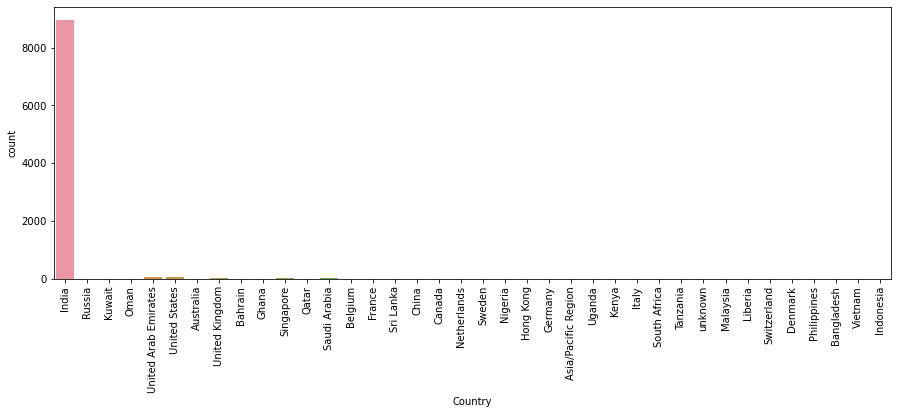

In [18]:
# Let's visualise 
plt.figure(figsize=(15,5))
plt1 = sns.countplot(x='Country', data = leads)
plt.xticks(rotation=90)
plt.show()
# Observation - Most of the customers are from India

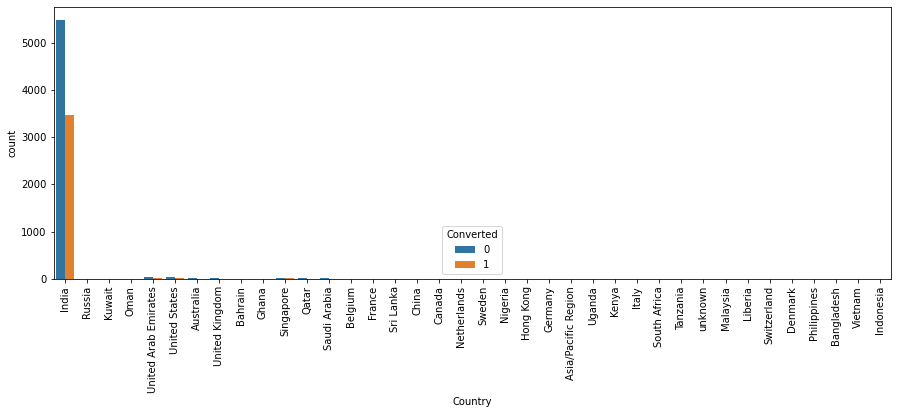

In [19]:
# Let's visualise against Target variable - Converted.
plt.figure(figsize=(15,5))
plt1 = sns.countplot(x='Country', hue='Converted', data = leads)
plt.xticks(rotation=90)
plt.show()
# Observation - Most of the leads are getting convrted from India.

From above Country = Indid is most common value among all, means it's highly skewed with only one type of category . 
If we impute NaN values with India still we have the same result. It's better to drop the country column. 

 2) SPECIALIZATION

In [20]:
# Check for Specialisation
leads['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [21]:
# As we see, most of the Leads has not provided specialization details, it might be their specilization is not available in the
# form or they are student or they may not have any specilization.
# Lets replace NaN with 'Others' specialisation category.

In [22]:
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Others')

In [23]:
# Check again 
leads['Specialization'].value_counts(dropna=False)

Others                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

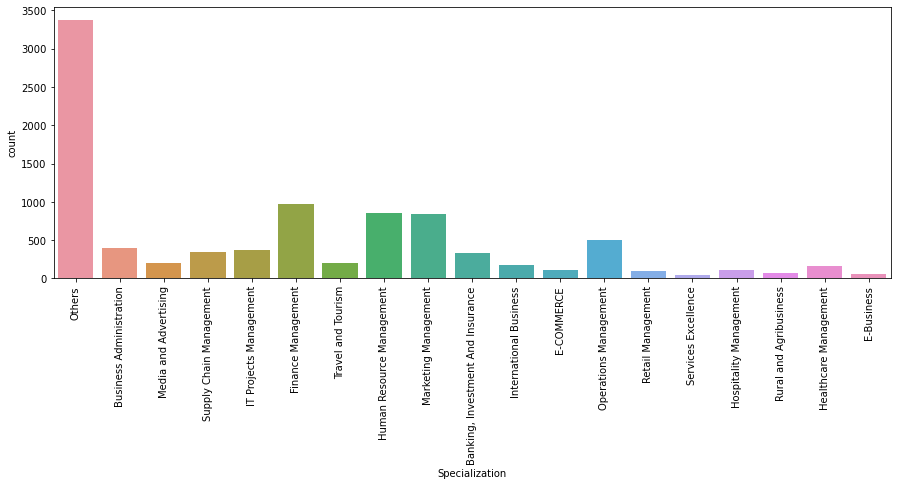

In [24]:
# Visualize the Specialization plot
plt.figure(figsize = (15,5))
plt2= sns.countplot(x='Specialization', data=leads)
plt.xticks(rotation = 90)
plt.show()

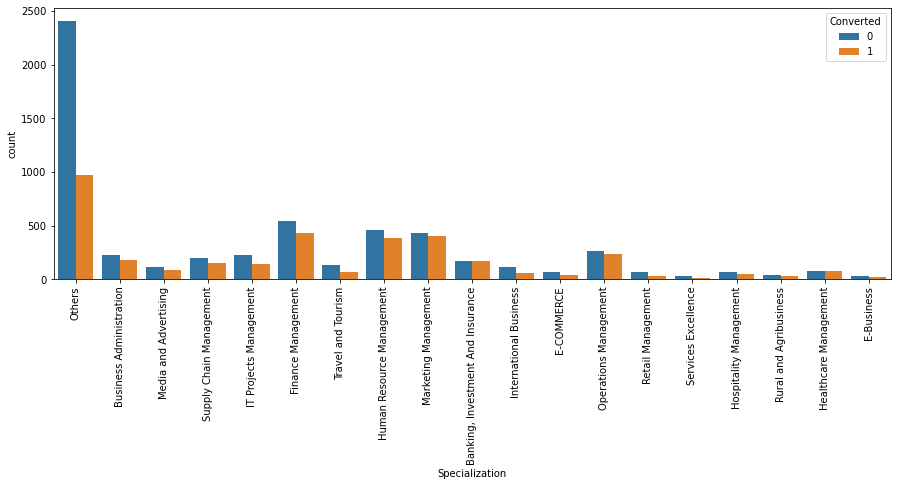

In [26]:
# Adding target variables to check if leads are converting from Specilization.
plt.figure(figsize = (15,5))
plt2= sns.countplot(x='Specialization', hue='Converted', data=leads)
plt.xticks(rotation = 90)
plt.show()
# From below we can see Finance, HR, MArketing and Operations Management they have good no. of leads converted.
# Lets Analyse and then will decide for dropping this columns as Others specilisation are highly skewed in nature.

In [27]:
#combining Management Specializations because they shows similar trends

leads['Specialization'] = leads['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                            'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'All_Management_Specializations') 

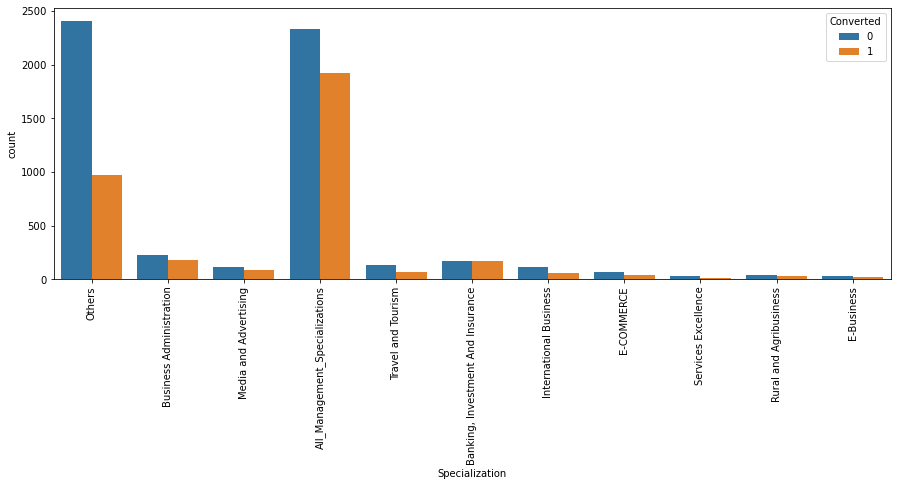

In [28]:
plt.figure(figsize = (15,5))
plt2= sns.countplot(x='Specialization', hue='Converted', data=leads)
plt.xticks(rotation = 90)
plt.show()

Observation - 1) All the Management specialization leads are highly converted. 
2) Very less Others specialization leads are converted.

 3) WHAT IS YOUR CURRENT OCCUPATION

In [29]:
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [30]:
# Lets impute NaN with Unemployed
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Unemployed')

In [31]:
leads['What is your current occupation'].value_counts(dropna=False)
# Most of the leads are from Unemployed categories.

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

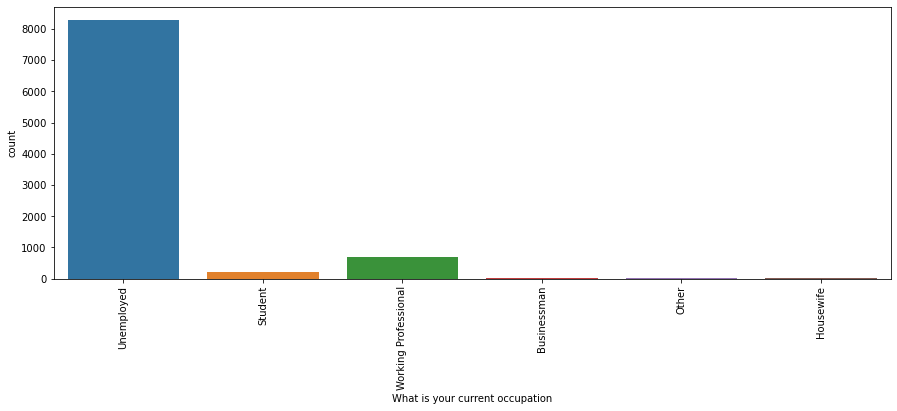

In [32]:
plt.figure(figsize = (15,5))
plt3 = sns.countplot(x='What is your current occupation', data=leads)
plt.xticks(rotation = 90)
plt.show()

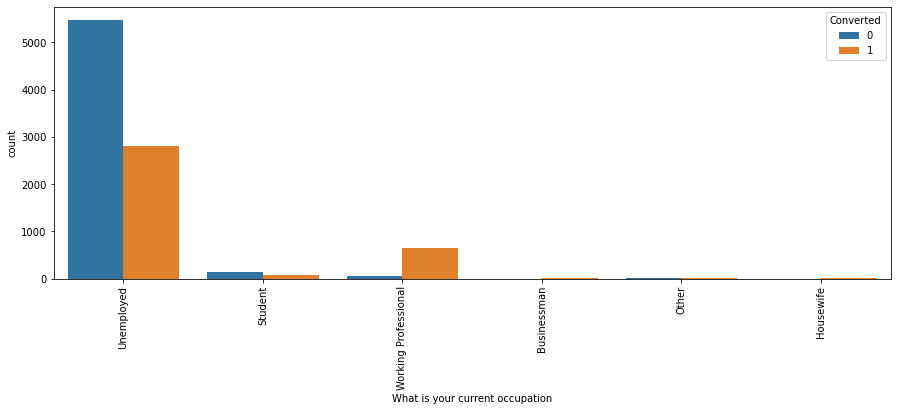

In [33]:
# Adding target variables to check if leads are converting from Current Occupation.
plt.figure(figsize = (15,5))
plt3 = sns.countplot(x='What is your current occupation', hue='Converted', data=leads)
plt.xticks(rotation = 90)
plt.show()

Observations - 1) Very good amount of Unemployed and Working_professional leads are getting converted.

4) WHAT MATTERS MOST TO YOU IN CHOOSING A COURSE

In [35]:
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [36]:
leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [37]:
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

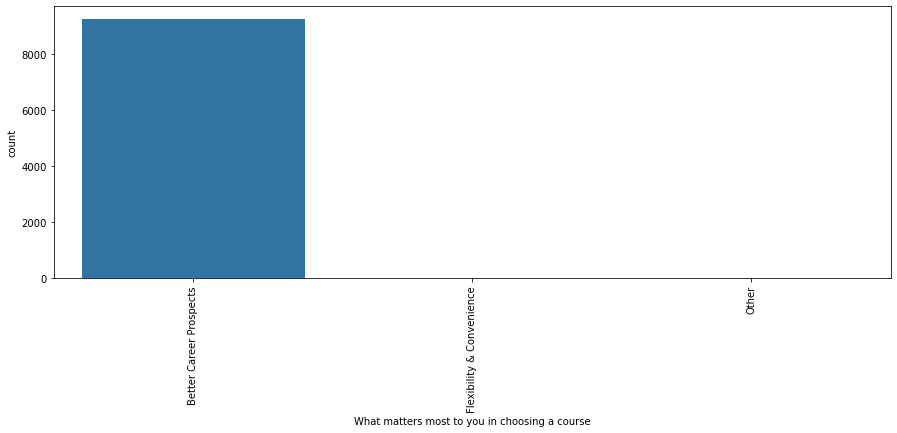

In [38]:
plt.figure(figsize = (15,5))
plt4 = sns.countplot(x='What matters most to you in choosing a course', data=leads)
plt.xticks(rotation = 90)
plt.show()

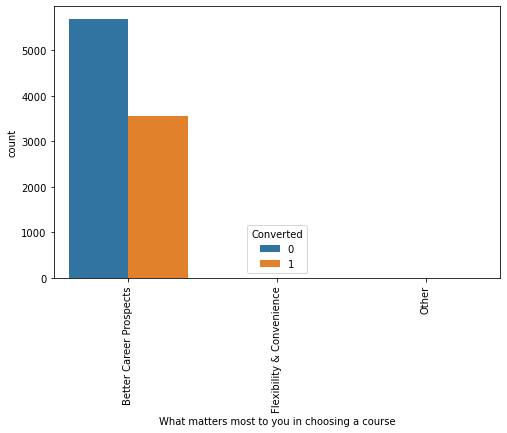

In [39]:
plt.figure(figsize = (8,5))
plt4 = sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data=leads)
plt.xticks(rotation = 90)
plt.show()

Observations - This column can be dropped as highly skewed categories on Better_Career_Prospects.

5) TAGS

In [40]:
leads['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [41]:
# Lets replace NaN values with 'Others' as this is high among all.
leads['Tags']=leads['Tags'].replace(np.nan,'Others')

In [42]:
leads['Tags'].value_counts(dropna=False)

Others                                               3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

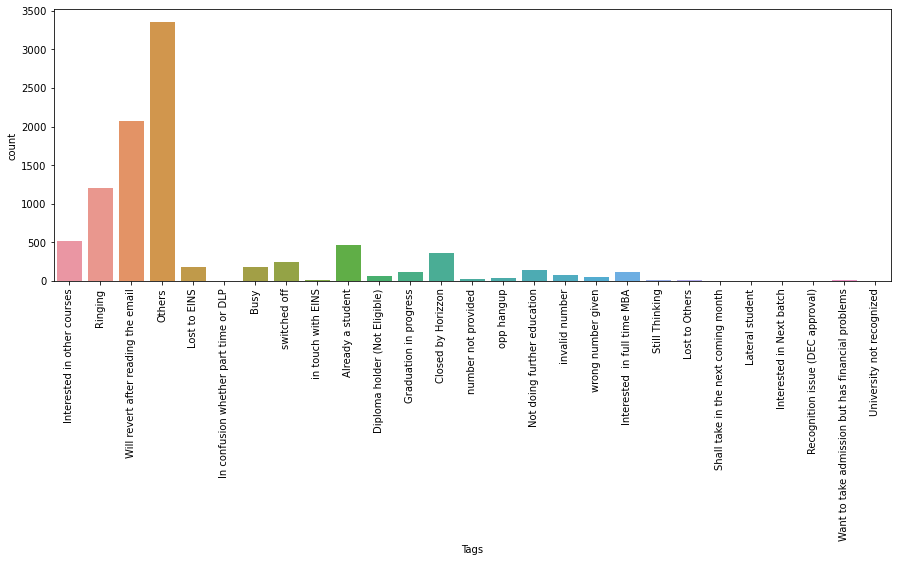

In [43]:
plt.figure(figsize = (15,5))
plt5 = sns.countplot(x='Tags', data=leads)
plt.xticks(rotation = 90)
plt.show()

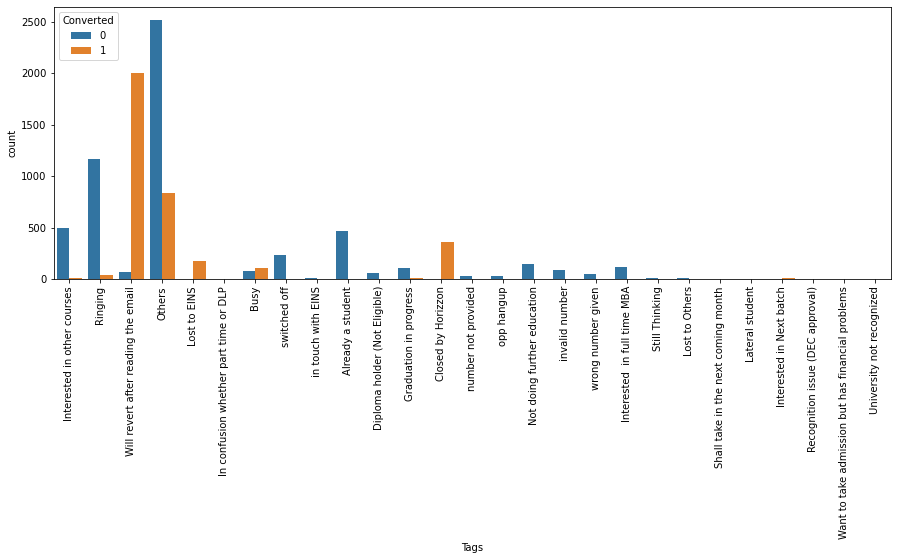

In [44]:
plt.figure(figsize = (15,5))
plt5 = sns.countplot(x='Tags', hue='Converted', data=leads)
plt.xticks(rotation = 90)
plt.show()

In [45]:
#replacing tags with low frequency with "Other Tags"
leads['Tags'] = leads['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS',
                        'Diploma holder (Not Eligible)','Graduation in progress','number not provided', 'opp hangup',
                        'Still Thinking','Lost to Others','Shall take in the next coming month','Lateral student',
                        'Interested in Next batch','Recognition issue (DEC approval)',
                        'Want to take admission but has financial problems','University not recognized'], 'Other_Tags')

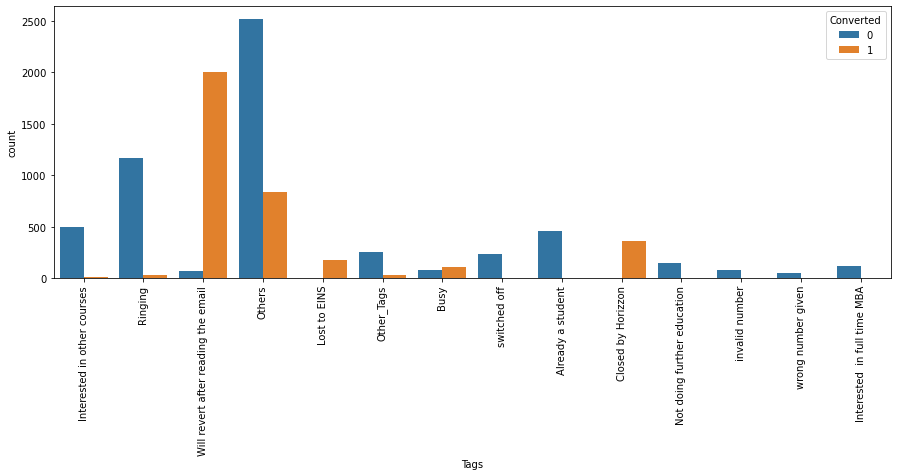

In [46]:
plt.figure(figsize = (15,5))
plt5 = sns.countplot(x='Tags', hue='Converted', data=leads)
plt.xticks(rotation = 90)
plt.show()

 Observations- we can see Will revert after reading the email are leads which are converted with vey good no.
 Others are very less converted leads.

 6) CITY

In [47]:
leads['City'].value_counts(dropna=False)
# Adding NaN in Mumbai as Other categories already present.

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [48]:
# Replacing NaN with Mumbai.
leads['City'] = leads['City'].replace(np.nan, 'Mumbai')

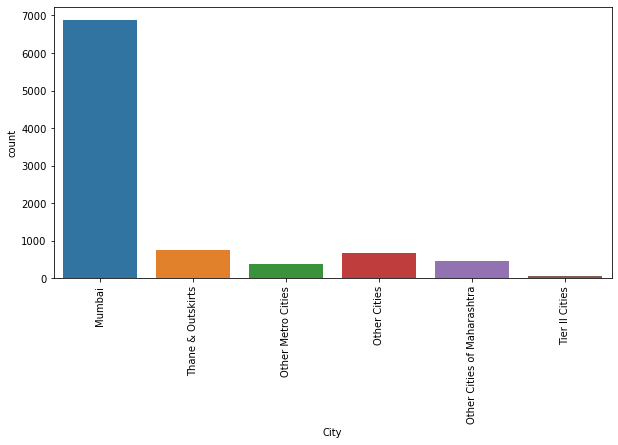

In [49]:
plt.figure(figsize = (10,5))
plt6 = sns.countplot(x='City', data=leads)
plt.xticks(rotation = 90)
plt.show()

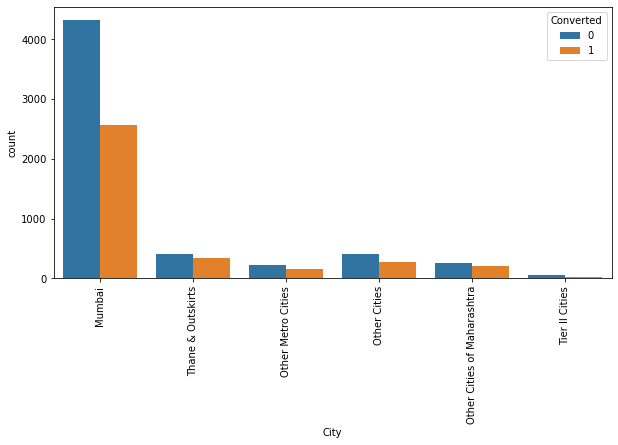

In [50]:
plt.figure(figsize = (10,5))
plt6 = sns.countplot(x='City', hue='Converted', data=leads)
plt.xticks(rotation = 90)
plt.show()

Observations - Getting very good no. of converted leads from City - Mumbai.

7) LEAD SOURCE

In [53]:
leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
testone                 1
NC_EDM                  1
welearnblog_Home        1
Pay per Click Ads       1
blog                    1
youtubechannel          1
Name: Lead Source, dtype: int64

In [54]:
#replacing Nan Values with new category Others and adding low frequency values in Others column.
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'] = leads['Lead Source'].replace('Social Media','Facebook')
leads['Lead Source'] = leads['Lead Source'].replace(np.nan,'Others')
leads['Lead Source'] = leads['Lead Source'].replace(['bing','Click2call','Press_Release','Pay per Click Ads','WeLearn',
                                                     'youtubechannel','welearnblog_Home','NC_EDM','testone','blog'] ,'Others')

In [55]:
leads['Lead Source'].value_counts(dropna=False)

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              57
Others                55
Live Chat              2
Name: Lead Source, dtype: int64

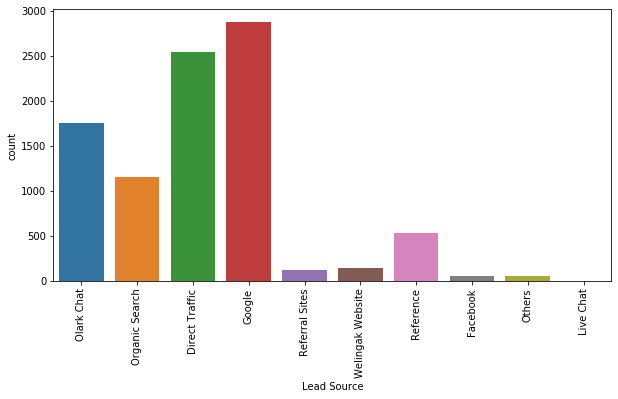

In [66]:
plt.figure(figsize = (10,5))
plt7 = sns.countplot(x='Lead Source', data=leads)
plt.xticks(rotation = 90)
plt.show()

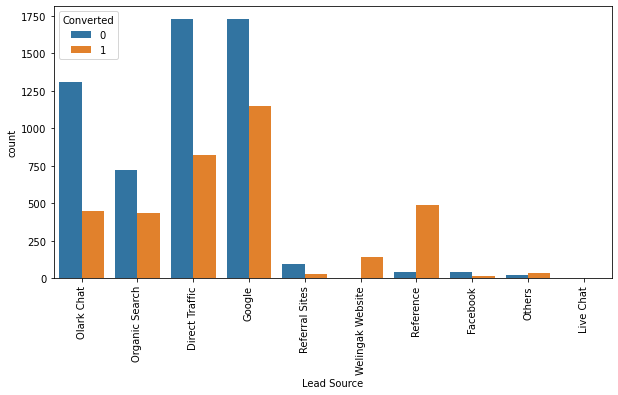

In [56]:
plt.figure(figsize = (10,5))
plt7 = sns.countplot(x='Lead Source', hue='Converted', data=leads)
plt.xticks(rotation = 90)
plt.show()

Observations- Maximun no of leads generated from Google followed by Direct Traffic.
Leads conversion rate is very high in Reference and Welingak Website.

8. Last Activity

In [57]:
leads['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

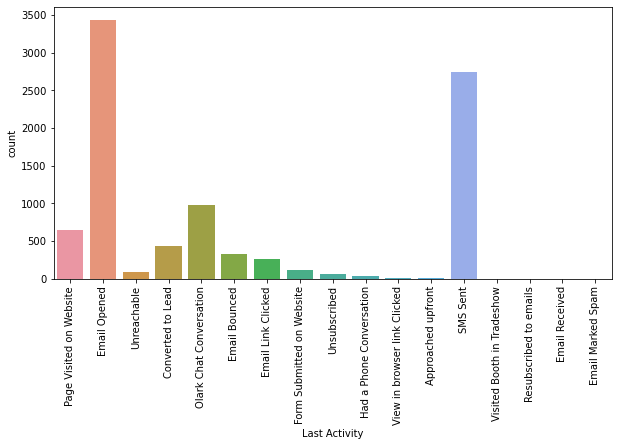

In [58]:
plt.figure(figsize = (10,5))
plt8 = sns.countplot(x='Last Activity', data=leads)
plt.xticks(rotation = 90)
plt.show()

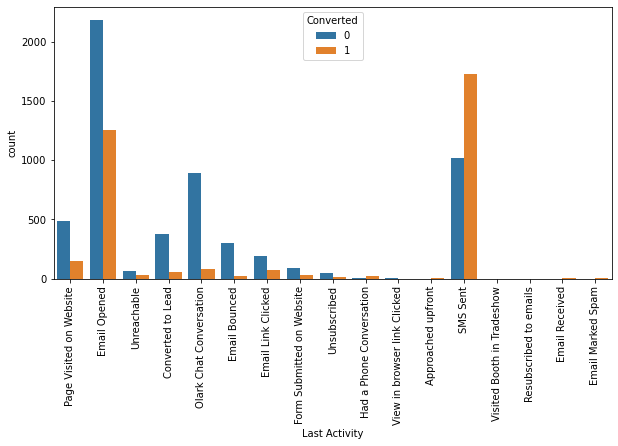

In [59]:
plt.figure(figsize = (10,5))
plt8 = sns.countplot(x='Last Activity', hue='Converted', data=leads)
plt.xticks(rotation = 90)
plt.show()

In [60]:
# Clubing low values variable in Others.
leads['Last Activity'] = leads['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                            'Approached upfront','Visited Booth in Tradeshow', 
                                            'Resubscribed to emails','Email Received', 'Email Marked Spam'],'Others')

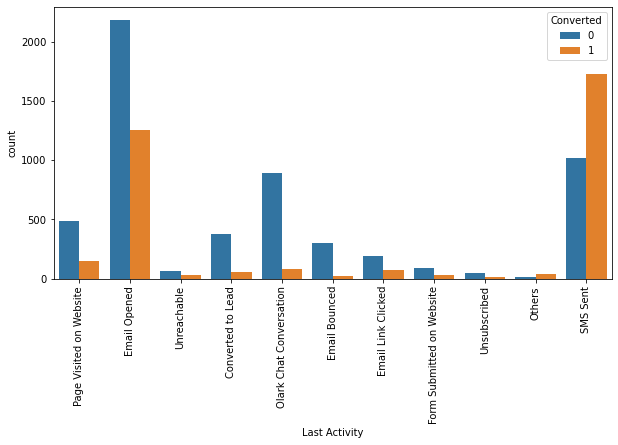

In [61]:
plt.figure(figsize = (10,5))
plt8 = sns.countplot(x='Last Activity', hue='Converted', data=leads)
plt.xticks(rotation = 90)
plt.show()

 Observations- 1) Very high convergence rate of leads in Last activity as SMS sent. 
 2) Last Activity as Email opened also getting converted leads. 

In [62]:
# Again check percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [63]:
# Let's drop all the rows from TotalVisits, Last Activity and Page Views Per Visit columns as they are very less in missing rows count.
leads = leads.dropna()

In [64]:
# Again check percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [65]:
# Observation - Now we dont have any missing value present in dataset.

9. Lead Origin

In [66]:
leads['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

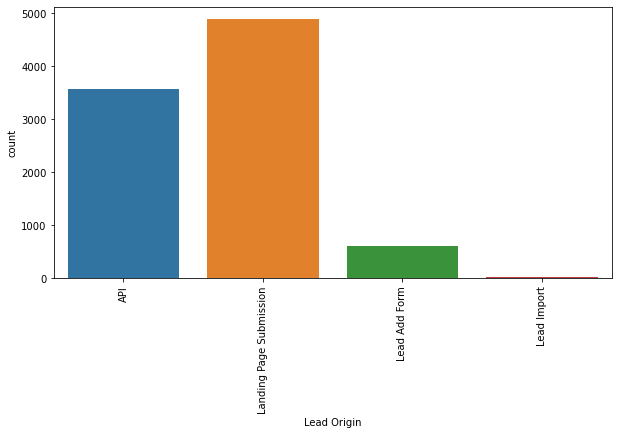

In [67]:
plt.figure(figsize = (10,5))
plt9 = sns.countplot(x='Lead Origin', data=leads)
plt.xticks(rotation = 90)
plt.show()

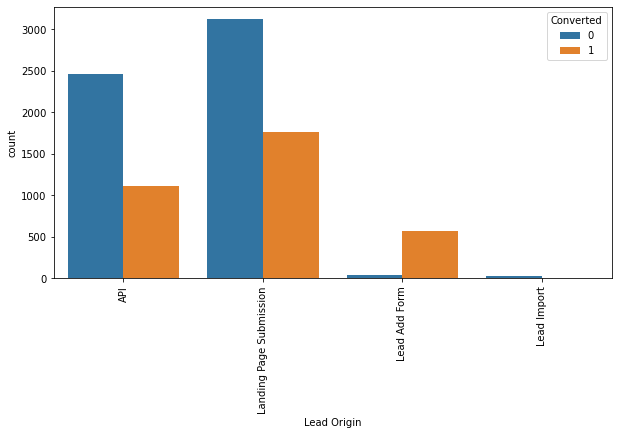

In [68]:
plt.figure(figsize = (10,5))
plt9 = sns.countplot(x='Lead Origin', hue='Converted', data=leads)
plt.xticks(rotation = 90)
plt.show()

 Observations - API and Landing Page Submission are having good number of leads.
 Lead Add Form has a very high conversion rate even though count of leads are very low.

 10. Last Notable Activity

In [69]:
leads['Last Notable Activity'].value_counts(dropna=False)

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Form Submitted on Website          1
Resubscribed to emails             1
Approached upfront                 1
View in browser link Clicked       1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [70]:
leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Email Bounced','Unreachable','Unsubscribed',
                        'Had a Phone Conversation','Email Marked Spam','Approached upfront','Form Submitted on Website',
                         'Email Received','View in browser link Clicked','Resubscribed to emails'],'Others_Notable_activity')

In [71]:
leads['Last Notable Activity'].value_counts(dropna=False)

Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Others_Notable_activity     160
Name: Last Notable Activity, dtype: int64

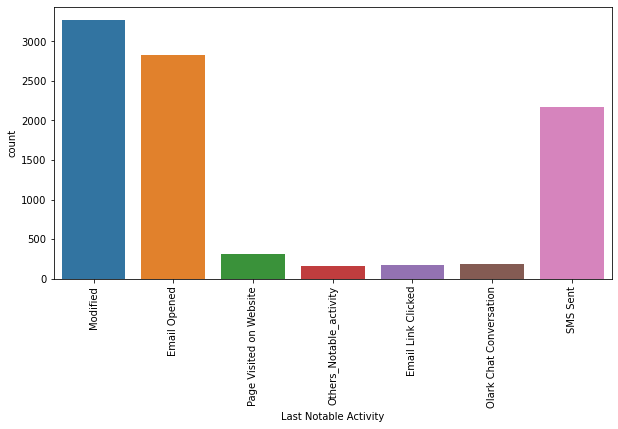

In [72]:
plt.figure(figsize = (10,5))
plt9 = sns.countplot(x='Last Notable Activity', data=leads)
plt.xticks(rotation = 90)
plt.show()

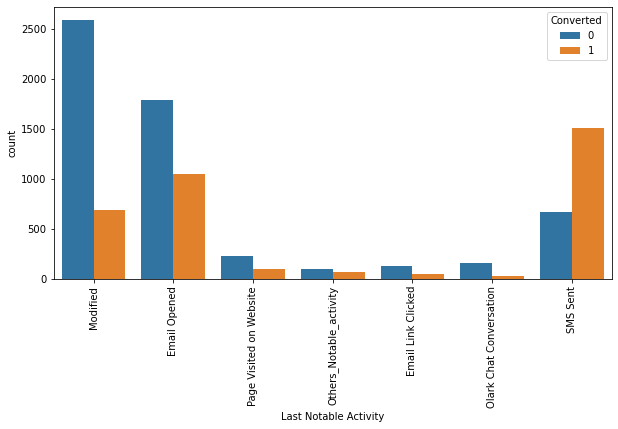

In [73]:
plt.figure(figsize = (10,5))
plt9 = sns.countplot(x='Last Notable Activity', hue='Converted', data=leads)
plt.xticks(rotation = 90)
plt.show()

 Observations - 1) SMS sent in Last Notable Activity has a very high conversion rate even though count of leads are very low.
 2) Getting good amount of leads from Modified and Email Opened which are converted.

In [74]:
# Lets check others score variable and highly skewed variables details.

In [75]:
# check value counts of DoNotEmail
leads['Do Not Email'].value_counts()

No     8379
Yes     724
Name: Do Not Email, dtype: int64

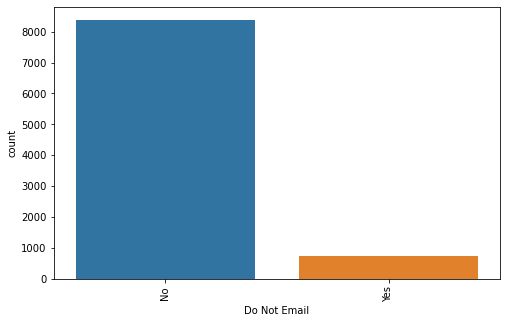

In [76]:
plt.figure(figsize = (8,5))
plt2= sns.countplot(x='Do Not Email', data=leads)
plt.xticks(rotation = 90)
plt.show()

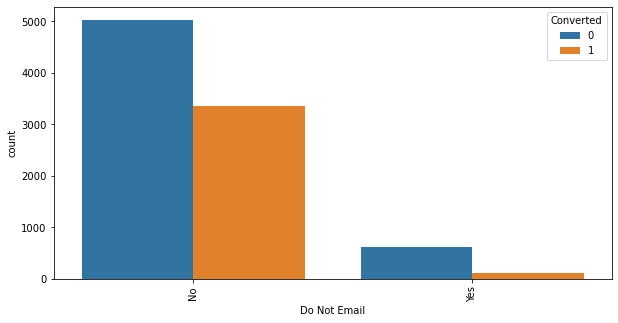

In [77]:
plt.figure(figsize = (10,5))
plt2= sns.countplot(x='Do Not Email', hue='Converted', data=leads)
plt.xticks(rotation = 90)
plt.show()

Observations - Good leads are generated from Do Not Email as No and those are highly converted.

In [78]:
# check value counts of DoNotCall
leads['Do Not Call'].value_counts()

No     9101
Yes       2
Name: Do Not Call, dtype: int64

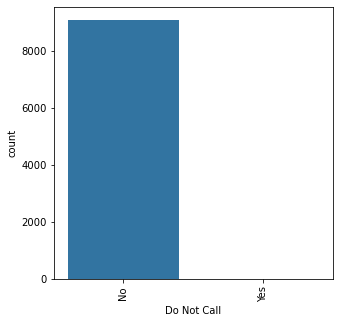

In [79]:
plt.figure(figsize = (5,5))
plt2= sns.countplot(x='Do Not Call', data=leads)
plt.xticks(rotation = 90)
plt.show()

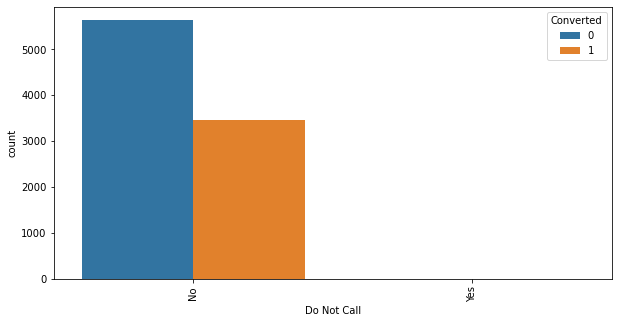

In [80]:
plt.figure(figsize = (10,5))
plt2= sns.countplot(x='Do Not Call', hue='Converted', data=leads)
plt.xticks(rotation = 90)
plt.show()

Observation - Good leads are generated from Do Not Call as No and those are highly converted.

In [81]:
leads['Search'].value_counts(dropna=False)

No     9089
Yes      14
Name: Search, dtype: int64

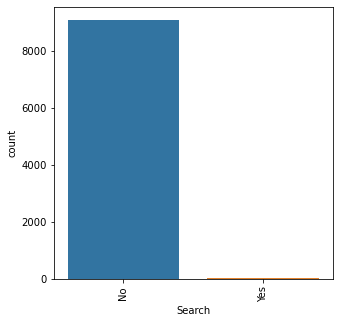

In [82]:
plt.figure(figsize = (5,5))
plt2= sns.countplot(x='Search', data=leads)
plt.xticks(rotation = 90)
plt.show()

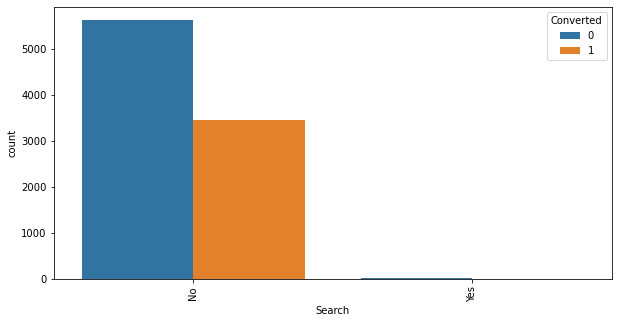

In [83]:
plt.figure(figsize = (10,5))
plt2= sns.countplot(x='Search', hue='Converted', data=leads)
plt.xticks(rotation = 90)
plt.show()

 Observation - Good leads are generated from Search as No and those are highly converted.

In [84]:
leads['Magazine'].value_counts(dropna=False)

No    9103
Name: Magazine, dtype: int64

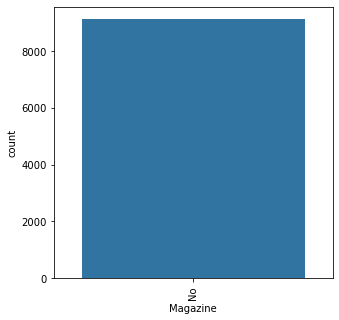

In [85]:
plt.figure(figsize = (5,5))
plt2= sns.countplot(x='Magazine', data=leads)
plt.xticks(rotation = 90)
plt.show()

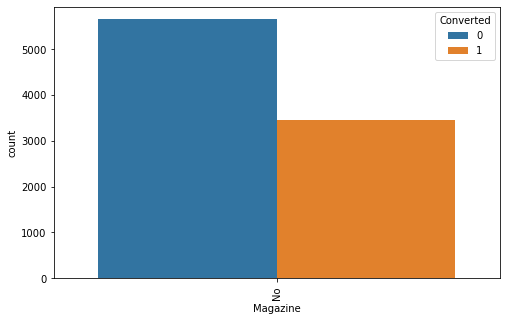

In [86]:
plt.figure(figsize = (8,5))
plt2= sns.countplot(x='Magazine', hue='Converted', data=leads)
plt.xticks(rotation = 90)
plt.show()

 Observation - Only No entries are present in Magazine so this is not much important for further analysis.

In [87]:
leads['Newspaper Article'].value_counts(dropna=False)

No     9101
Yes       2
Name: Newspaper Article, dtype: int64

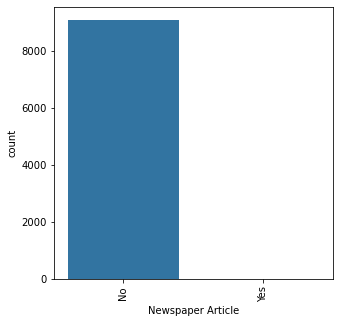

In [88]:
plt.figure(figsize = (5,5))
plt2= sns.countplot(x='Newspaper Article', data=leads)
plt.xticks(rotation = 90)
plt.show()

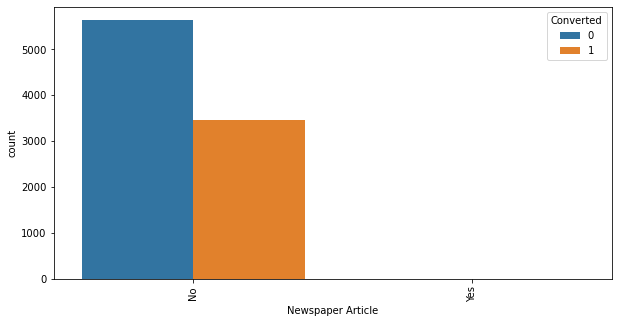

In [89]:
plt.figure(figsize = (10,5))
plt2= sns.countplot(x='Newspaper Article', hue='Converted', data=leads)
plt.xticks(rotation = 90)
plt.show()

 Observations - Only 2-Yes and others are No entries present in Newspaper Article so this is not much important for further analysis.

In [90]:
leads['X Education Forums'].value_counts(dropna=False)

No     9102
Yes       1
Name: X Education Forums, dtype: int64

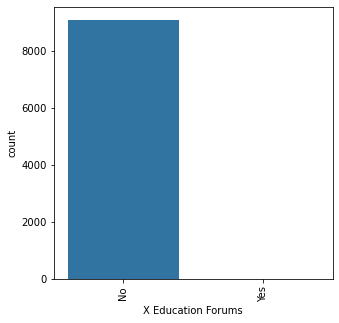

In [91]:
plt.figure(figsize = (5,5))
plt2= sns.countplot(x='X Education Forums', data=leads)
plt.xticks(rotation = 90)
plt.show()

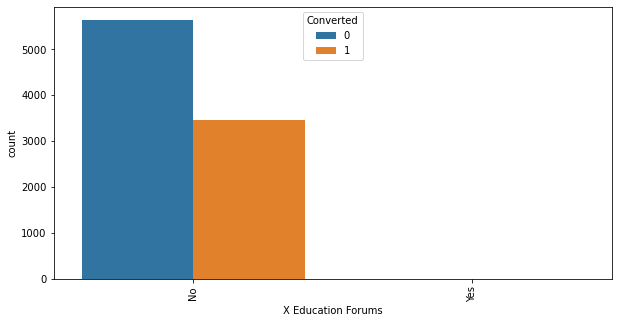

In [92]:
plt.figure(figsize = (10,5))
plt2= sns.countplot(x='X Education Forums',hue='Converted', data=leads)
plt.xticks(rotation = 90)
plt.show()

 Observations - Mostly all the entries are No in X Education Forums , nothing much can be analysed.

In [93]:
leads['Newspaper'].value_counts(dropna=False)

No     9102
Yes       1
Name: Newspaper, dtype: int64

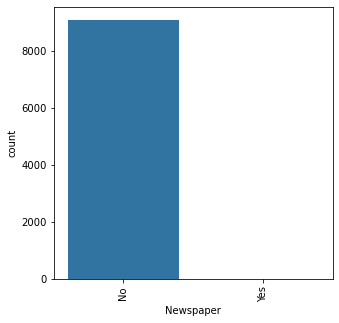

In [94]:
plt.figure(figsize = (5,5))
plt2= sns.countplot(x='Newspaper', data=leads)
plt.xticks(rotation = 90)
plt.show()

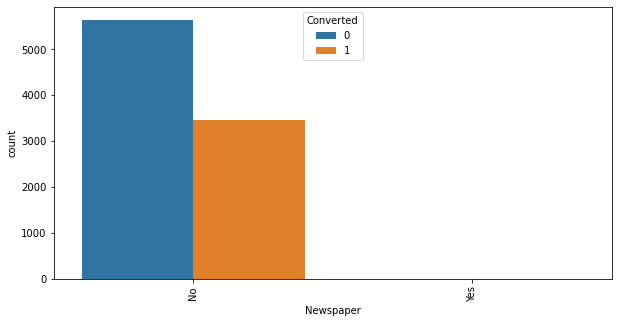

In [95]:
plt.figure(figsize = (10,5))
plt2= sns.countplot(x='Newspaper', hue='Converted', data=leads)
plt.xticks(rotation = 90)
plt.show()

In [96]:
leads['Digital Advertisement'].value_counts(dropna=False)

No     9099
Yes       4
Name: Digital Advertisement, dtype: int64

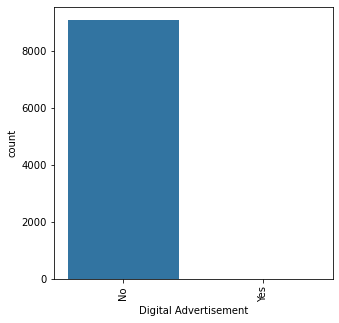

In [97]:
plt.figure(figsize = (5,5))
plt2= sns.countplot(x='Digital Advertisement', data=leads)
plt.xticks(rotation = 90)
plt.show()

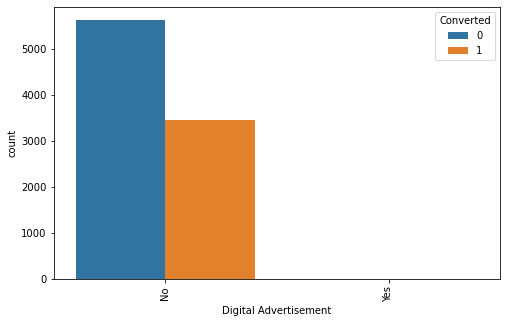

In [98]:
plt.figure(figsize = (8,5))
plt2= sns.countplot(x='Digital Advertisement', hue='Converted', data=leads)
plt.xticks(rotation = 90)
plt.show()

In [99]:
leads['Through Recommendations'].value_counts(dropna=False)

No     9096
Yes       7
Name: Through Recommendations, dtype: int64

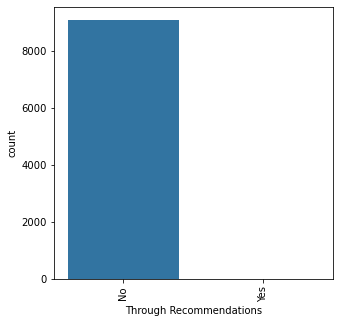

In [100]:
plt.figure(figsize = (5,5))
plt2= sns.countplot(x='Through Recommendations', data=leads)
plt.xticks(rotation = 90)
plt.show()

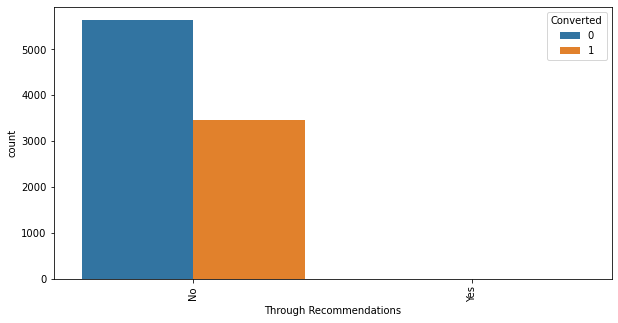

In [101]:
plt.figure(figsize = (10,5))
plt2= sns.countplot(x='Through Recommendations', hue='Converted', data=leads)
plt.xticks(rotation = 90)
plt.show()

In [102]:
leads['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9103
Name: Receive More Updates About Our Courses, dtype: int64

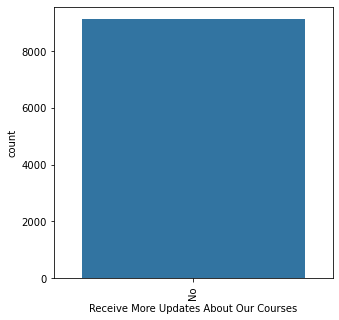

In [103]:
plt.figure(figsize = (5,5))
plt2= sns.countplot(x='Receive More Updates About Our Courses', data=leads)
plt.xticks(rotation = 90)
plt.show()

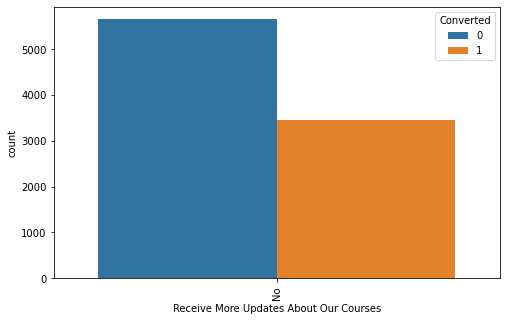

In [104]:
plt.figure(figsize = (8,5))
plt2= sns.countplot(x='Receive More Updates About Our Courses', hue='Converted', data=leads)
plt.xticks(rotation = 90)
plt.show()

In [105]:
leads['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9103
Name: Update me on Supply Chain Content, dtype: int64

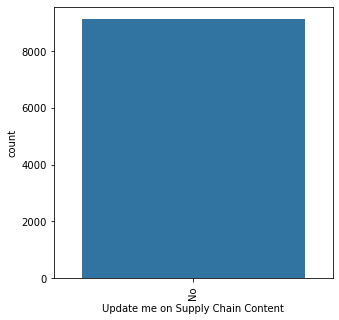

In [106]:
plt.figure(figsize = (5,5))
plt2= sns.countplot(x='Update me on Supply Chain Content', data=leads)
plt.xticks(rotation = 90)
plt.show()

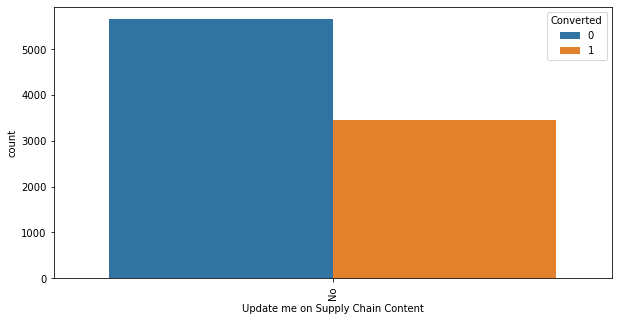

In [107]:
plt.figure(figsize = (10,5))
plt2= sns.countplot(x='Update me on Supply Chain Content', hue='Converted', data=leads)
plt.xticks(rotation = 90)
plt.show()

In [108]:
leads['Get updates on DM Content'].value_counts(dropna=False)

No    9103
Name: Get updates on DM Content, dtype: int64

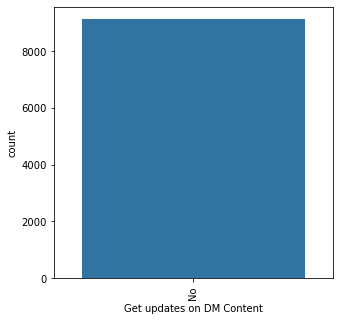

In [109]:
plt.figure(figsize = (5,5))
plt2= sns.countplot(x='Get updates on DM Content', data=leads)
plt.xticks(rotation = 90)
plt.show()

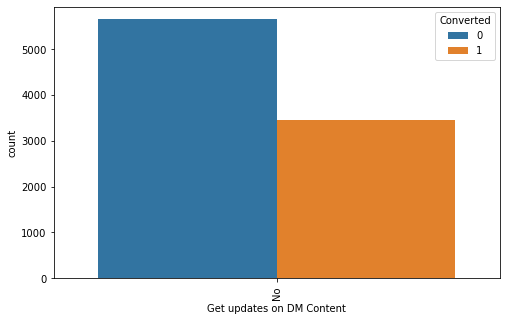

In [110]:
plt.figure(figsize = (8,5))
plt2= sns.countplot(x='Get updates on DM Content', hue='Converted', data=leads)
plt.xticks(rotation = 90)
plt.show()

In [111]:
leads['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9103
Name: I agree to pay the amount through cheque, dtype: int64

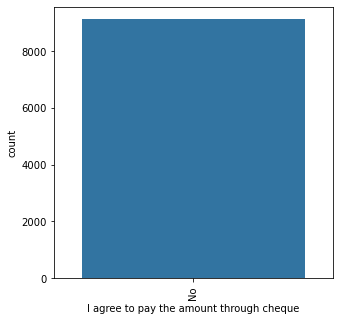

In [112]:
plt.figure(figsize = (5,5))
plt2= sns.countplot(x='I agree to pay the amount through cheque', data=leads)
plt.xticks(rotation = 90)
plt.show()

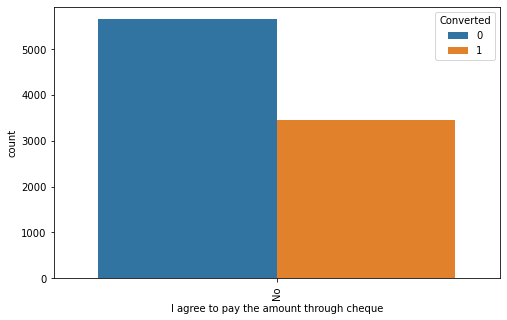

In [113]:
plt.figure(figsize = (8,5))
plt2= sns.countplot(x='I agree to pay the amount through cheque', hue='Converted', data=leads)
plt.xticks(rotation = 90)
plt.show()

In [114]:
leads['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

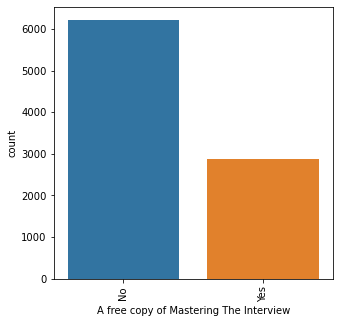

In [115]:
plt.figure(figsize = (5,5))
plt2= sns.countplot(x='A free copy of Mastering The Interview', data=leads)
plt.xticks(rotation = 90)
plt.show()

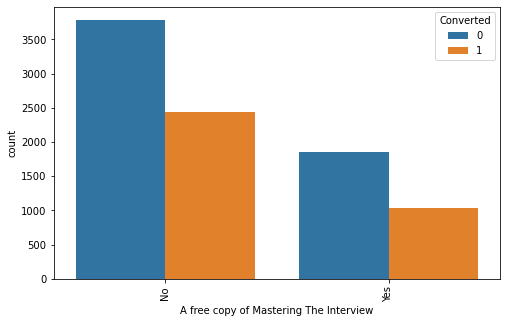

In [116]:
plt.figure(figsize = (8,5))
plt2= sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data=leads)
plt.xticks(rotation = 90)
plt.show()

In [117]:
# From above inspection looks like there are highly skewed columns, few are score variable columns present. So those columns should be dropped.
# Score Variable are- Tags, Lead Qualit and Lead Profile and others are highly skewed
drop_columns = ['Country','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Tags',
                'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Newspaper',
                'Update me on Supply Chain Content','What matters most to you in choosing a course',
              'A free copy of Mastering The Interview','Get updates on DM Content','I agree to pay the amount through cheque']
drop_columns

['Country',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Tags',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Newspaper',
 'Update me on Supply Chain Content',
 'What matters most to you in choosing a course',
 'A free copy of Mastering The Interview',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [118]:
# Check percentage of rows retained BEFORE dropping columns
round(100 * (len(leads.index)/9240),0)

99.0

In [119]:
leads.shape

(9103, 28)

In [120]:
# Dropping Columns
leads = leads.drop(drop_columns,axis=1)
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9103 non-null   object 
 1   Lead Source                      9103 non-null   object 
 2   Do Not Email                     9103 non-null   object 
 3   Converted                        9103 non-null   int64  
 4   TotalVisits                      9103 non-null   float64
 5   Total Time Spent on Website      9103 non-null   int64  
 6   Page Views Per Visit             9103 non-null   float64
 7   Last Activity                    9103 non-null   object 
 8   Specialization                   9103 non-null   object 
 9   What is your current occupation  9103 non-null   object 
 10  City                             9103 non-null   object 
 11  Last Notable Activity            9103 non-null   object 
dtypes: float64(2), int64

In [121]:
leads.shape

(9103, 12)

In [122]:
# Check percentage of rows retained AFTER dropping columns
round(100 * (len(leads.index)/9240),0)

99.0

In [123]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai,Modified


In [124]:
# Check if any outliers present for Numerical columns

In [125]:
leads.describe(percentiles=[0.05,.25,.5,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000,9103.000000
mean,0.380204,3.445238,481.350104,2.362820
std,0.485464,4.854853,545.066142,2.161418
min,0.000000,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,9.000000,1.000000
50%,0.000000,3.000000,244.000000,2.000000
75%,1.000000,5.000000,919.500000,3.000000
90%,1.000000,7.000000,1372.000000,5.000000
95%,1.000000,10.000000,1556.900000,6.000000


Observation - Outliers are present in Total Visits and Page Views Per Visit

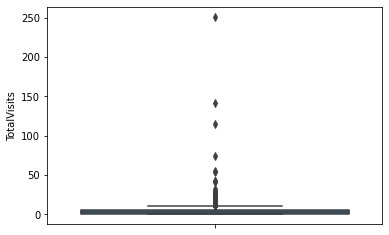

In [126]:
plt.figure(figsize=(6,4))
sns.boxplot(y='TotalVisits', data=leads)
plt.show()

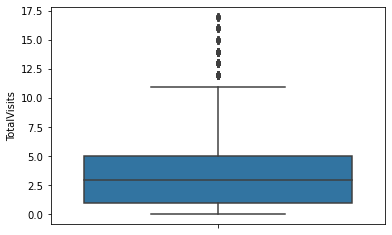

In [127]:
#Outlier Treatment: Remove top 1% & bottom 5% of the Column Outlier values

Q3 = leads.TotalVisits.quantile(0.99)
leads = leads[(leads.TotalVisits <= Q3)]
Q1 = leads.TotalVisits.quantile(0.01)
leads = leads[(leads.TotalVisits >= Q1)]
sns.boxplot(y='TotalVisits', data=leads)
plt.show()

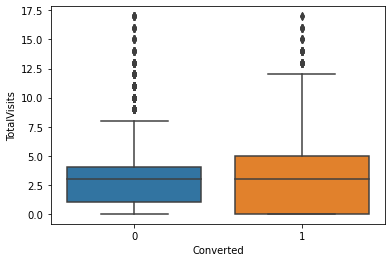

In [128]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

In [129]:
# check size after outlier treatment.
leads.shape

(9020, 12)

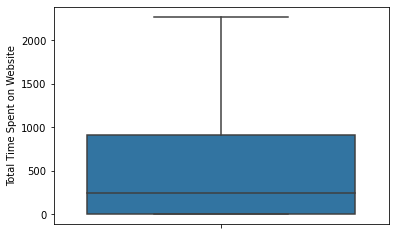

In [130]:
plt.figure(figsize=(6,4))
sns.boxplot(y='Total Time Spent on Website', data=leads)
plt.show()

Observations - No outliers present in Total Time Spent on Websites

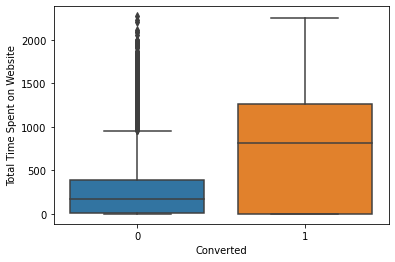

In [131]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads)
plt.show()

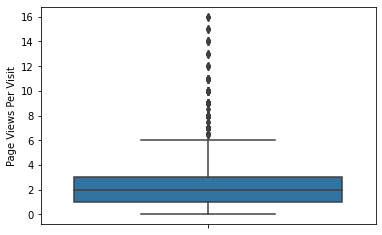

In [132]:
plt.figure(figsize=(6,4))
sns.boxplot(y='Page Views Per Visit', data=leads)
plt.show()

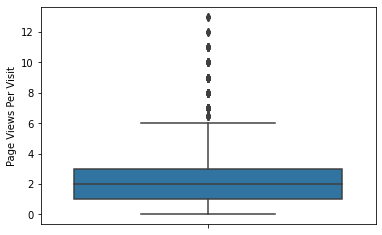

In [133]:
Q3 = leads.TotalVisits.quantile(0.99)
leads = leads[(leads.TotalVisits <= Q3)]
Q1 = leads.TotalVisits.quantile(0.01)
leads = leads[(leads.TotalVisits >= Q1)]
sns.boxplot(y='Page Views Per Visit', data=leads)
plt.show()

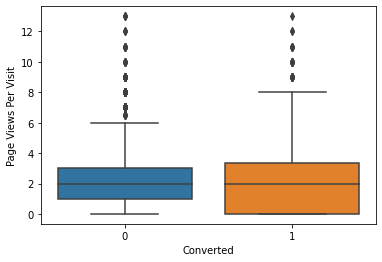

In [134]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads)
plt.show()

In [135]:
# check size after outlier treatment.
leads.shape

(8929, 12)

In [136]:
# Again check percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                        0.0
Lead Source                        0.0
Do Not Email                       0.0
Converted                          0.0
TotalVisits                        0.0
Total Time Spent on Website        0.0
Page Views Per Visit               0.0
Last Activity                      0.0
Specialization                     0.0
What is your current occupation    0.0
City                               0.0
Last Notable Activity              0.0
dtype: float64

### Dummy Variable Creation

In [137]:
#check the list of categorical columns
categorical_columns = leads.select_dtypes(include=['object']).columns
categorical_columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'City',
       'Last Notable Activity'],
      dtype='object')

#### Converting some binary variables (Yes/No) to 0/1

In [138]:
# List of variables to map

varlist =  ['Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})


leads[varlist] = leads[varlist].apply(binary_map)
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai,Modified


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [139]:
# Creating a dummy variable for categorical variables and dropping the first one.
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'City','Last Notable Activity']], drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Media and Advertising,Specialization_Others,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [140]:
# check the rows and columns count after dummification.
dummy.shape

(8929, 48)

In [141]:
# concat dummy dataframe with main dataframe
leads = pd.concat([leads,dummy], axis=1)
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Media and Advertising,Specialization_Others,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,Modified,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai,Email Opened,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [142]:
# again check the rows and columns count.
leads.shape

(8929, 60)

In [143]:
# Lets drop the original columns after dummy variable creation
leads.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity'], axis=1, inplace = True)
leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Media and Advertising,Specialization_Others,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,0,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [144]:
leads.shape

(8929, 53)

### Modeling - Train - Test Split

In [145]:
# import train-test split scikit learn library for modeling
from sklearn.model_selection import train_test_split 

In [146]:
# Drop the target variable
X = leads.drop(['Converted'], axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Media and Advertising,Specialization_Others,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [147]:
# Check the size
X.shape

(8929, 52)

In [148]:
# define y = target variable
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [149]:
# Spliting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=150)

In [150]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Media and Advertising,Specialization_Others,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
3274,0,4.0,126,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
2232,1,3.0,1129,3.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3871,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
8555,0,3.0,321,3.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4673,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [151]:
X_test.shape

(2679, 52)

In [152]:
X_train.shape

(6250, 52)

In [153]:
y_test.shape

(2679,)

In [154]:
y_train.shape

(6250,)

Observation - We have very large amount of data present for modeling. lets do the modeling.

#### Scaling Data/ Standardisation/ Feature Scaling

In [156]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Note- Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

In [157]:
# We have 3 numerical columns present in dataset, lets scale those columns. 
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Media and Advertising,Specialization_Others,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
3274,0,0.329794,-0.641978,-0.148702,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
2232,1,-0.030558,1.195907,0.352147,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3871,0,-1.111615,-0.872859,-1.150400,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
8555,0,-0.030558,-0.284662,0.352147,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4673,0,-1.111615,-0.872859,-1.150400,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [158]:
# check the total no. of converted leads after all the processing.
converted = round((sum(leads['Converted'])/len(leads['Converted'].index))*100,2)

In [159]:
print('We have almost {} % converted rate after all the processing.'.format(converted))

We have almost 37.91 % converted rate after all the processing.


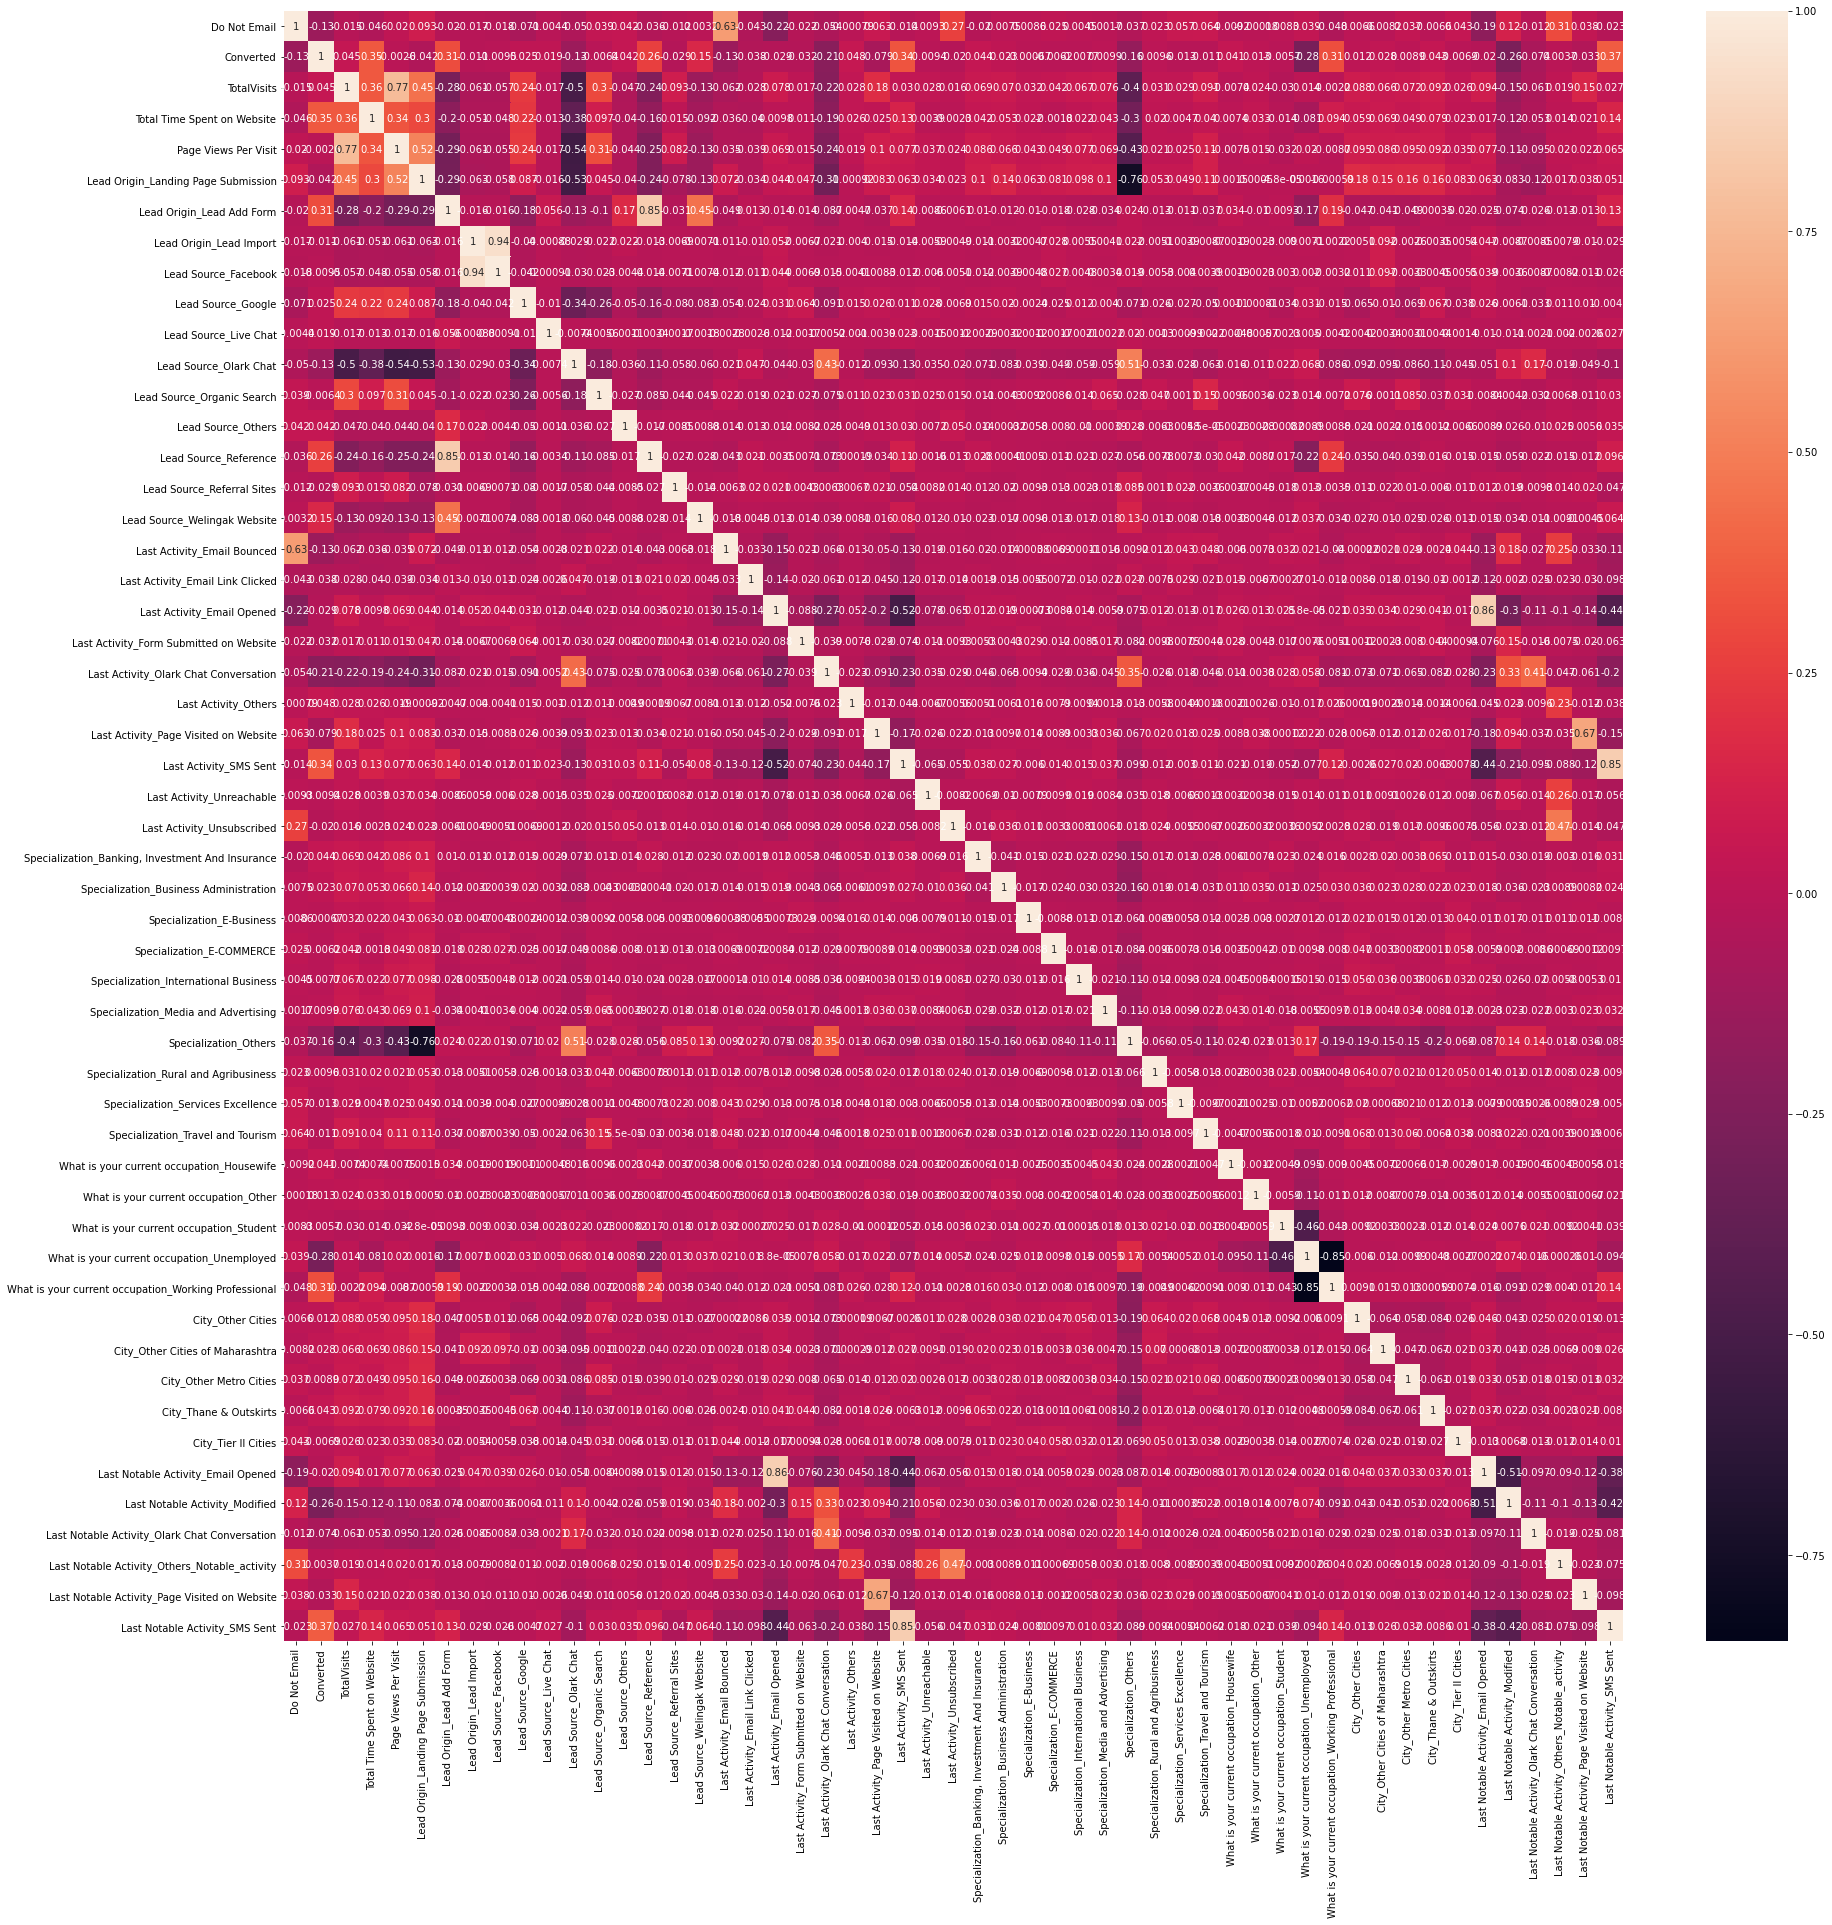

In [160]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,30))       
sns.heatmap(leads.corr(),annot = True)
plt.show()

### Model Building

In [161]:
import statsmodels.api as sm

In [162]:
# Logistic regression model
logm = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6250
Model:                            GLM   Df Residuals:                     6197
Model Family:                Binomial   Df Model:                           52
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2510.8
Date:                Mon, 07 Sep 2020   Deviance:                       5021.6
Time:                        06:31:15   Pearson chi2:                 6.36e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0358      1.260     -0.028      0.977      -2.505       2.433
Do Not Email                                            -1.2269      0.219     -5.602      0.000      -1.656      -0.798
TotalVisits                                              0.2534      0.056      4.485      0.000       0.143       0.364
Total Time Spent on Website                              1.0681      0.041     25.924      0.000       0.987       1.149
Page Views Per Visit                                    -0.2301      0.059     -3.914      0.000      -0.345      -0.115
Lead Origin_Landing Page Submission                     -0.8876      0.140     -6.342      0.000      -1.162      -0.613
Lead Origin_Lead Add Form                                4.4055      1.256      3.508      0.000       1.944       6.867
Lead Origin_Lead Import                                 -0.2018      1.403     -0.144      0.886      -2.952       2.549
Lead Source_Facebook                                     1.1928      1.342      0.889      0.374      -1.438       3.824
Lead Source_Google                                       0.3158      0.099      3.204      0.001       0.123       0.509
Lead Source_Live Chat                                   19.2905   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Olark Chat                                   1.3236      0.162      8.191      0.000       1.007       1.640
Lead Source_Organic Search                               0.1637      0.133      1.232      0.218      -0.097       0.424
Lead Source_Others                                       0.4656      0.723      0.644      0.519      -0.951       1.882
Lead Source_Reference                                   -0.6674      1.277     -0.523      0.601      -3.170       1.835
Lead Source_Referral Sites                               0.1172      0.325      0.360      0.719      -0.520       0.755
Lead Source_Welingak Website                             2.4271      1.610      1.508      0.132      -0.728       5.582
Last Activity_Email Bounced                             -1.1606      0.544     -2.133      0.033      -2.227      -0.094
Last Activity_Email Link Clicked                         0.3186      0.408      0.780      0.435      -0.482       1.119
Last Activity_Email Opened                               0.7407      0.238      3.106      0.002       0.273       1.208
Last Activity_Form Submitted on Website                 -0.2619      0.400     -0.655      0.513      -1.046       0.522
Last Activity_Olark Chat Conversation                   -0.5214      0.269     -1.941      0.052      -1.048       0.005
Last Activity_Others                                     1

### Feature Selection Using RFE

In [163]:
# import scikit learn logistic regression libraries
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [164]:
# import RFE
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 25)
rfe = rfe.fit(X_train, y_train)

In [165]:
rfe.support_

array([ True, False,  True, False,  True,  True, False,  True,  True,
       False,  True, False,  True, False, False,  True,  True, False,
        True,  True,  True,  True, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False,  True,  True,  True, False,  True])

In [166]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 4),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 5),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 3),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 17),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 11),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', False, 7),
 ('Lead Source_Referral Sites', False, 15),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 10),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 8),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Ac

In [167]:
# list of columns which we are using in RFE
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Others', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Others_Notable_activity',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [168]:
# list of columns which we are not using in RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Source_Live Chat', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Link Clicked',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Page Visited on Website'],

#### Assessing model with StatsModels

In [169]:
# Model-1
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6250
Model:                            GLM   Df Residuals:                     6224
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2527.6
Date:                Mon, 07 Sep 2020   Deviance:                       5055.3
Time:                        06:32:14   Pearson chi2:                 6.34e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5432      1.173      0.463      0.643      -1.756       2.842
Do Not Email                                            -1.2830      0.206     -6.227      0.000      -1.687      -0.879
Total Time Spent on Website                              1.0730      0.041     26.197      0.000       0.993       1.153
Lead Origin_Landing Page Submission                     -0.9720      0.134     -7.269      0.000      -1.234      -0.710
Lead Origin_Lead Add Form                                3.6706      0.268     13.720      0.000       3.146       4.195
Lead Source_Facebook                                     0.8504      0.462      1.841      0.066      -0.055       1.756
Lead Source_Google                                       0.2526      0.083      3.039      0.002       0.090       0.416
Lead Source_Olark Chat                                   1.2155      0.135      8.994      0.000       0.951       1.480
Lead Source_Others                                       0.6052      0.551      1.098      0.272      -0.475       1.685
Lead Source_Welingak Website                             3.0497      1.041      2.929      0.003       1.009       5.090
Last Activity_Email Bounced                             -1.2563      0.453     -2.770      0.006      -2.145      -0.367
Last Activity_Email Opened                               0.4604      0.128      3.588      0.000       0.209       0.712
Last Activity_Form Submitted on Website                 -0.4683      0.363     -1.291      0.197      -1.179       0.243
Last Activity_Olark Chat Conversation                   -0.7092      0.206     -3.444      0.001      -1.113      -0.306
Last Activity_Others                                     1.5626      0.512      3.053      0.002       0.559       2.566
Last Activity_SMS Sent                                   0.8970      0.173      5.189      0.000       0.558       1.236
Specialization_Others                                   -1.1340      0.127     -8.935      0.000      -1.383      -0.885
What is your current occupation_Housewife               21.8615   1.51e+04      0.001      0.999   -2.97e+04    2.97e+04
What is your current occupation_Other                   -0.8558      1.393     -0.614      0.539      -3.586       1.875
What is your current occupation_Student                 -0.9144      1.187     -0.770      0.441      -3.241       1.412
What is your current occupation_Unemployed              -1.4607      1.165     -1.254      0.210      -3.744       0.823
What is your current occupation_Working Professional     1.1876      1.180      1.006      0.314      -1.126       3.501
Last Notable Activity_Modified                          -0

In [170]:
# drop the column What is your current occupation_Housewife as it has high p-value.
col = col.drop('What is your current occupation_Housewife', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Others', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Others',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Others_Notable_activity',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [171]:
# Model-2
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6250
Model:                            GLM   Df Residuals:                     6225
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2529.4
Date:                Mon, 07 Sep 2020   Deviance:                       5058.7
Time:                        06:32:40   Pearson chi2:                 6.34e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.8847      0.915      2.060      0.039       0.091       3.678
Do Not Email                                            -1.2823      0.206     -6.224      0.000      -1.686      -0.878
Total Time Spent on Website                              1.0727      0.041     26.190      0.000       0.992       1.153
Lead Origin_Landing Page Submission                     -0.9659      0.134     -7.232      0.000      -1.228      -0.704
Lead Origin_Lead Add Form                                3.6739      0.268     13.732      0.000       3.150       4.198
Lead Source_Facebook                                     0.8539      0.462      1.849      0.064      -0.051       1.759
Lead Source_Google                                       0.2548      0.083      3.067      0.002       0.092       0.418
Lead Source_Olark Chat                                   1.2168      0.135      9.001      0.000       0.952       1.482
Lead Source_Others                                       0.6047      0.551      1.097      0.272      -0.475       1.685
Lead Source_Welingak Website                             3.0479      1.041      2.928      0.003       1.007       5.089
Last Activity_Email Bounced                             -1.2561      0.453     -2.770      0.006      -2.145      -0.367
Last Activity_Email Opened                               0.4616      0.128      3.599      0.000       0.210       0.713
Last Activity_Form Submitted on Website                 -0.4641      0.359     -1.294      0.196      -1.167       0.239
Last Activity_Olark Chat Conversation                   -0.7171      0.206     -3.476      0.001      -1.121      -0.313
Last Activity_Others                                     1.5632      0.512      3.055      0.002       0.560       2.566
Last Activity_SMS Sent                                   0.8962      0.173      5.186      0.000       0.558       1.235
Specialization_Others                                   -1.1304      0.127     -8.921      0.000      -1.379      -0.882
What is your current occupation_Other                   -2.2012      1.180     -1.865      0.062      -4.515       0.112
What is your current occupation_Student                 -2.2620      0.926     -2.443      0.015      -4.076      -0.448
What is your current occupation_Unemployed              -2.8085      0.897     -3.132      0.002      -4.566      -1.051
What is your current occupation_Working Professional    -0.1606      0.916     -0.175      0.861      -1.955       1.634
Last Notable Activity_Modified                          -0.2945      0.117     -2.507      0.012      -0.525      -0.064
Last Notable Activity_Olark Chat Conversation           -0

In [172]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [173]:
# Check the VIF value also
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,What is your current occupation_Unemployed,23.00
2,Lead Origin_Landing Page Submission,7.65
23,Last Notable Activity_SMS Sent,7.56
14,Last Activity_SMS Sent,7.32
15,Specialization_Others,4.89
10,Last Activity_Email Opened,4.73
20,Last Notable Activity_Modified,4.07
6,Lead Source_Olark Chat,2.89
19,What is your current occupation_Working Profes...,2.63
12,Last Activity_Olark Chat Conversation,2.43


In [174]:
# Drop the What is your current occupation_Unemployed as it has very high VIF value.
col = col.drop('What is your current occupation_Unemployed', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Others', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Others',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Others_Notable_activity',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [175]:
# Model - 3
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6250
Model:                            GLM   Df Residuals:                     6226
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2535.5
Date:                Mon, 07 Sep 2020   Deviance:                       5071.0
Time:                        06:33:41   Pearson chi2:                 6.35e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9154      0.182     -5.041      0.000      -1.271      -0.559
Do Not Email                                            -1.2873      0.206     -6.251      0.000      -1.691      -0.884
Total Time Spent on Website                              1.0705      0.041     26.189      0.000       0.990       1.151
Lead Origin_Landing Page Submission                     -0.9705      0.134     -7.264      0.000      -1.232      -0.709
Lead Origin_Lead Add Form                                3.6900      0.267     13.814      0.000       3.166       4.213
Lead Source_Facebook                                     0.8429      0.462      1.825      0.068      -0.062       1.748
Lead Source_Google                                       0.2519      0.083      3.036      0.002       0.089       0.414
Lead Source_Olark Chat                                   1.2114      0.135      8.974      0.000       0.947       1.476
Lead Source_Others                                       0.5929      0.552      1.075      0.283      -0.489       1.674
Lead Source_Welingak Website                             3.0280      1.041      2.909      0.004       0.988       5.068
Last Activity_Email Bounced                             -1.2571      0.453     -2.774      0.006      -2.145      -0.369
Last Activity_Email Opened                               0.4690      0.128      3.664      0.000       0.218       0.720
Last Activity_Form Submitted on Website                 -0.3616      0.355     -1.019      0.308      -1.058       0.334
Last Activity_Olark Chat Conversation                   -0.7008      0.205     -3.410      0.001      -1.104      -0.298
Last Activity_Others                                     1.5583      0.512      3.044      0.002       0.555       2.562
Last Activity_SMS Sent                                   0.8923      0.173      5.166      0.000       0.554       1.231
Specialization_Others                                   -1.1399      0.127     -8.981      0.000      -1.389      -0.891
What is your current occupation_Other                    0.5963      0.769      0.775      0.438      -0.911       2.104
What is your current occupation_Student                  0.5387      0.236      2.284      0.022       0.076       1.001
What is your current occupation_Working Professional     2.6365      0.200     13.181      0.000       2.244       3.029
Last Notable Activity_Modified                          -0.2909      0.117     -2.483      0.013      -0.521      -0.061
Last Notable Activity_Olark Chat Conversation           -0.5978      0.412     -1.450      0.147      -1.406       0.210
Last Notable Activity_Others_Notable_activity            1

In [176]:
# Check the VIF value also
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Last Activity_SMS Sent,7.16
22,Last Notable Activity_SMS Sent,7.03
2,Lead Origin_Landing Page Submission,4.00
15,Specialization_Others,3.39
19,Last Notable Activity_Modified,3.30
10,Last Activity_Email Opened,3.16
6,Lead Source_Olark Chat,2.59
12,Last Activity_Olark Chat Conversation,2.38
0,Do Not Email,1.95
3,Lead Origin_Lead Add Form,1.92


In [177]:
col = col.drop('What is your current occupation_Other', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Others', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Others',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Others_Notable_activity',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [178]:
# Model - 4
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6250
Model:                            GLM   Df Residuals:                     6227
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2535.8
Date:                Mon, 07 Sep 2020   Deviance:                       5071.6
Time:                        06:34:00   Pearson chi2:                 6.35e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9089      0.181     -5.010      0.000      -1.264      -0.553
Do Not Email                                            -1.2880      0.206     -6.255      0.000      -1.692      -0.884
Total Time Spent on Website                              1.0712      0.041     26.207      0.000       0.991       1.151
Lead Origin_Landing Page Submission                     -0.9751      0.133     -7.306      0.000      -1.237      -0.714
Lead Origin_Lead Add Form                                3.6872      0.267     13.804      0.000       3.164       4.211
Lead Source_Facebook                                     0.8396      0.462      1.818      0.069      -0.065       1.745
Lead Source_Google                                       0.2509      0.083      3.025      0.002       0.088       0.413
Lead Source_Olark Chat                                   1.2109      0.135      8.971      0.000       0.946       1.475
Lead Source_Others                                       0.5930      0.551      1.075      0.282      -0.488       1.674
Lead Source_Welingak Website                             3.0306      1.041      2.911      0.004       0.990       5.071
Last Activity_Email Bounced                             -1.2576      0.453     -2.775      0.006      -2.146      -0.369
Last Activity_Email Opened                               0.4691      0.128      3.665      0.000       0.218       0.720
Last Activity_Form Submitted on Website                 -0.3652      0.355     -1.028      0.304      -1.061       0.331
Last Activity_Olark Chat Conversation                   -0.6986      0.205     -3.401      0.001      -1.101      -0.296
Last Activity_Others                                     1.5571      0.512      3.041      0.002       0.554       2.561
Last Activity_SMS Sent                                   0.8917      0.173      5.164      0.000       0.553       1.230
Specialization_Others                                   -1.1455      0.127     -9.038      0.000      -1.394      -0.897
What is your current occupation_Student                  0.5369      0.236      2.276      0.023       0.075       0.999
What is your current occupation_Working Professional     2.6347      0.200     13.169      0.000       2.243       3.027
Last Notable Activity_Modified                          -0.2903      0.117     -2.478      0.013      -0.520      -0.061
Last Notable Activity_Olark Chat Conversation           -0.6015      0.412     -1.458      0.145      -1.410       0.207
Last Notable Activity_Others_Notable_activity            1.6865      0.328      5.137      0.000       1.043       2.330
Last Notable Activity_SMS Sent                           1

In [179]:
# Check the VIF value also
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Last Activity_SMS Sent,7.16
21,Last Notable Activity_SMS Sent,7.03
2,Lead Origin_Landing Page Submission,4.00
15,Specialization_Others,3.39
18,Last Notable Activity_Modified,3.30
10,Last Activity_Email Opened,3.16
6,Lead Source_Olark Chat,2.59
12,Last Activity_Olark Chat Conversation,2.38
0,Do Not Email,1.95
3,Lead Origin_Lead Add Form,1.92


In [180]:
# Drop the column Lead Source_Others as it has high p-value.
col = col.drop('Last Activity_Form Submitted on Website', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Others', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Others',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Others_Notable_activity',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [181]:
# Model - 5
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6250
Model:                            GLM   Df Residuals:                     6228
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2536.4
Date:                Mon, 07 Sep 2020   Deviance:                       5072.7
Time:                        06:34:09   Pearson chi2:                 6.35e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9359      0.180     -5.207      0.000      -1.288      -0.584
Do Not Email                                            -1.2849      0.206     -6.240      0.000      -1.688      -0.881
Total Time Spent on Website                              1.0708      0.041     26.203      0.000       0.991       1.151
Lead Origin_Landing Page Submission                     -0.9685      0.133     -7.275      0.000      -1.229      -0.708
Lead Origin_Lead Add Form                                3.6885      0.267     13.812      0.000       3.165       4.212
Lead Source_Facebook                                     0.8382      0.462      1.816      0.069      -0.066       1.743
Lead Source_Google                                       0.2465      0.083      2.977      0.003       0.084       0.409
Lead Source_Olark Chat                                   1.2063      0.135      8.942      0.000       0.942       1.471
Lead Source_Others                                       0.5948      0.553      1.076      0.282      -0.488       1.678
Lead Source_Welingak Website                             3.0255      1.041      2.906      0.004       0.985       5.066
Last Activity_Email Bounced                             -1.2351      0.453     -2.727      0.006      -2.123      -0.347
Last Activity_Email Opened                               0.4934      0.126      3.908      0.000       0.246       0.741
Last Activity_Olark Chat Conversation                   -0.6630      0.203     -3.270      0.001      -1.060      -0.266
Last Activity_Others                                     1.5862      0.512      3.099      0.002       0.583       2.589
Last Activity_SMS Sent                                   0.9276      0.170      5.472      0.000       0.595       1.260
Specialization_Others                                   -1.1335      0.126     -8.991      0.000      -1.381      -0.886
What is your current occupation_Student                  0.5412      0.236      2.294      0.022       0.079       1.004
What is your current occupation_Working Professional     2.6292      0.200     13.176      0.000       2.238       3.020
Last Notable Activity_Modified                          -0.3046      0.117     -2.613      0.009      -0.533      -0.076
Last Notable Activity_Olark Chat Conversation           -0.6152      0.412     -1.493      0.135      -1.423       0.192
Last Notable Activity_Others_Notable_activity            1.6923      0.328      5.158      0.000       1.049       2.335
Last Notable Activity_SMS Sent                           1.0508      0.189      5.559      0.000       0.680       1.421
==========================================================

In [182]:
# Check the VIF value also
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Last Activity_SMS Sent,6.97
20,Last Notable Activity_SMS Sent,6.96
2,Lead Origin_Landing Page Submission,3.97
14,Specialization_Others,3.39
17,Last Notable Activity_Modified,3.19
10,Last Activity_Email Opened,3.12
6,Lead Source_Olark Chat,2.57
11,Last Activity_Olark Chat Conversation,2.32
0,Do Not Email,1.95
3,Lead Origin_Lead Add Form,1.91


In [183]:
# Drop the What is your current occupation_Other as it has high p-value.
col = col.drop('Lead Source_Others', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Others', 'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Others_Notable_activity',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [184]:
# Model - 6
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6250
Model:                            GLM   Df Residuals:                     6229
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2536.9
Date:                Mon, 07 Sep 2020   Deviance:                       5073.9
Time:                        06:34:17   Pearson chi2:                 6.36e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9363      0.180     -5.209      0.000      -1.289      -0.584
Do Not Email                                            -1.2685      0.205     -6.201      0.000      -1.669      -0.868
Total Time Spent on Website                              1.0700      0.041     26.192      0.000       0.990       1.150
Lead Origin_Landing Page Submission                     -0.9641      0.133     -7.247      0.000      -1.225      -0.703
Lead Origin_Lead Add Form                                3.7367      0.265     14.118      0.000       3.218       4.255
Lead Source_Facebook                                     0.8368      0.461      1.814      0.070      -0.068       1.741
Lead Source_Google                                       0.2436      0.083      2.944      0.003       0.081       0.406
Lead Source_Olark Chat                                   1.2024      0.135      8.919      0.000       0.938       1.467
Lead Source_Welingak Website                             2.9707      1.040      2.856      0.004       0.932       5.009
Last Activity_Email Bounced                             -1.2570      0.452     -2.780      0.005      -2.143      -0.371
Last Activity_Email Opened                               0.4926      0.126      3.901      0.000       0.245       0.740
Last Activity_Olark Chat Conversation                   -0.6642      0.203     -3.276      0.001      -1.062      -0.267
Last Activity_Others                                     1.5804      0.512      3.086      0.002       0.577       2.584
Last Activity_SMS Sent                                   0.9252      0.169      5.461      0.000       0.593       1.257
Specialization_Others                                   -1.1284      0.126     -8.958      0.000      -1.375      -0.881
What is your current occupation_Student                  0.5393      0.236      2.286      0.022       0.077       1.002
What is your current occupation_Working Professional     2.6267      0.200     13.165      0.000       2.236       3.018
Last Notable Activity_Modified                          -0.3046      0.117     -2.613      0.009      -0.533      -0.076
Last Notable Activity_Olark Chat Conversation           -0.6149      0.412     -1.493      0.135      -1.422       0.192
Last Notable Activity_Others_Notable_activity            1.7027      0.327      5.203      0.000       1.061       2.344
Last Notable Activity_SMS Sent                           1.0518      0.189      5.567      0.000       0.681       1.422
========================================================================================================================
"""

In [185]:
# Check the VIF value also
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last Activity_SMS Sent,6.97
19,Last Notable Activity_SMS Sent,6.96
2,Lead Origin_Landing Page Submission,3.97
13,Specialization_Others,3.38
16,Last Notable Activity_Modified,3.19
9,Last Activity_Email Opened,3.11
6,Lead Source_Olark Chat,2.57
10,Last Activity_Olark Chat Conversation,2.32
0,Do Not Email,1.94
8,Last Activity_Email Bounced,1.87


In [186]:
# Drop the Last Activity_Form Submitted on Website as it has high p-value.
col = col.drop('Last Notable Activity_Olark Chat Conversation', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Others', 'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Others_Notable_activity',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [187]:
# Model - 7
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6250
Model:                            GLM   Df Residuals:                     6230
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2538.1
Date:                Mon, 07 Sep 2020   Deviance:                       5076.2
Time:                        06:34:21   Pearson chi2:                 6.37e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9673      0.179     -5.416      0.000      -1.317      -0.617
Do Not Email                                            -1.2700      0.204     -6.216      0.000      -1.670      -0.870
Total Time Spent on Website                              1.0654      0.041     26.183      0.000       0.986       1.145
Lead Origin_Landing Page Submission                     -0.9661      0.133     -7.263      0.000      -1.227      -0.705
Lead Origin_Lead Add Form                                3.7259      0.265     14.083      0.000       3.207       4.244
Lead Source_Facebook                                     0.8376      0.461      1.817      0.069      -0.066       1.741
Lead Source_Google                                       0.2410      0.083      2.915      0.004       0.079       0.403
Lead Source_Olark Chat                                   1.1951      0.135      8.870      0.000       0.931       1.459
Lead Source_Welingak Website                             2.9465      1.038      2.837      0.005       0.911       4.982
Last Activity_Email Bounced                             -1.2637      0.452     -2.798      0.005      -2.149      -0.378
Last Activity_Email Opened                               0.5197      0.125      4.158      0.000       0.275       0.765
Last Activity_Olark Chat Conversation                   -0.7938      0.188     -4.227      0.000      -1.162      -0.426
Last Activity_Others                                     1.5655      0.511      3.063      0.002       0.564       2.567
Last Activity_SMS Sent                                   0.9079      0.169      5.380      0.000       0.577       1.239
Specialization_Others                                   -1.1290      0.126     -8.958      0.000      -1.376      -0.882
What is your current occupation_Student                  0.5291      0.236      2.245      0.025       0.067       0.991
What is your current occupation_Working Professional     2.6260      0.199     13.168      0.000       2.235       3.017
Last Notable Activity_Modified                          -0.2510      0.111     -2.270      0.023      -0.468      -0.034
Last Notable Activity_Others_Notable_activity            1.7422      0.326      5.344      0.000       1.103       2.381
Last Notable Activity_SMS Sent                           1.1043      0.185      5.957      0.000       0.741       1.468
========================================================================================================================
"""

In [188]:
# Check the VIF value also
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last Activity_SMS Sent,6.90
18,Last Notable Activity_SMS Sent,6.70
2,Lead Origin_Landing Page Submission,3.84
13,Specialization_Others,3.33
9,Last Activity_Email Opened,3.07
16,Last Notable Activity_Modified,2.78
6,Lead Source_Olark Chat,2.56
10,Last Activity_Olark Chat Conversation,1.96
0,Do Not Email,1.94
8,Last Activity_Email Bounced,1.87


In [189]:
# Drop Lead Source_Facebook column as it has high p-value.
col = col.drop('Lead Source_Facebook', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Others', 'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Others_Notable_activity',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [190]:
# Model - 8
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6250
Model:                            GLM   Df Residuals:                     6231
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2539.6
Date:                Mon, 07 Sep 2020   Deviance:                       5079.2
Time:                        06:34:24   Pearson chi2:                 6.36e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9257      0.177     -5.227      0.000      -1.273      -0.579
Do Not Email                                            -1.2718      0.204     -6.228      0.000      -1.672      -0.872
Total Time Spent on Website                              1.0586      0.040     26.174      0.000       0.979       1.138
Lead Origin_Landing Page Submission                     -1.0022      0.132     -7.606      0.000      -1.260      -0.744
Lead Origin_Lead Add Form                                3.6836      0.263     13.982      0.000       3.167       4.200
Lead Source_Google                                       0.2263      0.082      2.754      0.006       0.065       0.387
Lead Source_Olark Chat                                   1.1586      0.133      8.715      0.000       0.898       1.419
Lead Source_Welingak Website                             2.9541      1.038      2.845      0.004       0.919       4.990
Last Activity_Email Bounced                             -1.2567      0.451     -2.784      0.005      -2.142      -0.372
Last Activity_Email Opened                               0.5262      0.125      4.214      0.000       0.281       0.771
Last Activity_Olark Chat Conversation                   -0.7872      0.188     -4.195      0.000      -1.155      -0.419
Last Activity_Others                                     1.5638      0.511      3.062      0.002       0.563       2.565
Last Activity_SMS Sent                                   0.9201      0.169      5.457      0.000       0.590       1.251
Specialization_Others                                   -1.1465      0.126     -9.095      0.000      -1.394      -0.899
What is your current occupation_Student                  0.5353      0.236      2.271      0.023       0.073       0.997
What is your current occupation_Working Professional     2.6280      0.199     13.183      0.000       2.237       3.019
Last Notable Activity_Modified                          -0.2534      0.111     -2.292      0.022      -0.470      -0.037
Last Notable Activity_Others_Notable_activity            1.7411      0.326      5.343      0.000       1.102       2.380
Last Notable Activity_SMS Sent                           1.0930      0.185      5.900      0.000       0.730       1.456
========================================================================================================================
"""

In [191]:
# Check the VIF value also
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Activity_SMS Sent,6.87
17,Last Notable Activity_SMS Sent,6.70
2,Lead Origin_Landing Page Submission,3.82
12,Specialization_Others,3.33
8,Last Activity_Email Opened,3.02
15,Last Notable Activity_Modified,2.78
5,Lead Source_Olark Chat,2.53
9,Last Activity_Olark Chat Conversation,1.95
0,Do Not Email,1.94
7,Last Activity_Email Bounced,1.87


In [192]:
# Drop Lead Source_Facebook column as it has high p-value.
col = col.drop('Last Activity_SMS Sent', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Specialization_Others',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Others_Notable_activity',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [193]:
# Model - 9
X_train_sm = sm.add_constant(X_train[col])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6250
Model:                            GLM   Df Residuals:                     6232
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2554.3
Date:                Mon, 07 Sep 2020   Deviance:                       5108.6
Time:                        06:34:27   Pearson chi2:                 6.39e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7527      0.171     -4.395      0.000      -1.088      -0.417
Do Not Email                                            -1.2585      0.204     -6.168      0.000      -1.658      -0.859
Total Time Spent on Website                              1.0618      0.040     26.332      0.000       0.983       1.141
Lead Origin_Landing Page Submission                     -0.9721      0.131     -7.428      0.000      -1.229      -0.716
Lead Origin_Lead Add Form                                3.7888      0.265     14.295      0.000       3.269       4.308
Lead Source_Google                                       0.2301      0.082      2.810      0.005       0.070       0.391
Lead Source_Olark Chat                                   1.1715      0.132      8.846      0.000       0.912       1.431
Lead Source_Welingak Website                             2.9747      1.040      2.860      0.004       0.936       5.013
Last Activity_Email Bounced                             -1.4589      0.446     -3.274      0.001      -2.332      -0.585
Last Activity_Email Opened                               0.3035      0.114      2.657      0.008       0.080       0.527
Last Activity_Olark Chat Conversation                   -1.0764      0.178     -6.054      0.000      -1.425      -0.728
Last Activity_Others                                     1.3259      0.501      2.648      0.008       0.344       2.307
Specialization_Others                                   -1.1275      0.125     -8.999      0.000      -1.373      -0.882
What is your current occupation_Student                  0.5071      0.234      2.164      0.030       0.048       0.966
What is your current occupation_Working Professional     2.6169      0.198     13.192      0.000       2.228       3.006
Last Notable Activity_Modified                          -0.1360      0.106     -1.278      0.201      -0.345       0.073
Last Notable Activity_Others_Notable_activity            1.5981      0.322      4.962      0.000       0.967       2.229
Last Notable Activity_SMS Sent                           1.8088      0.133     13.636      0.000       1.549       2.069
========================================================================================================================
"""

In [194]:
# Check the VIF value also
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.68
11,Specialization_Others,3.29
8,Last Activity_Email Opened,2.83
16,Last Notable Activity_SMS Sent,2.57
14,Last Notable Activity_Modified,2.55
5,Lead Source_Olark Chat,2.50
0,Do Not Email,1.93
7,Last Activity_Email Bounced,1.81
3,Lead Origin_Lead Add Form,1.81
9,Last Activity_Olark Chat Conversation,1.79


In [195]:
# Drop Last Notable Activity_Modified column as it has high p-value.
col = col.drop('Last Notable Activity_Modified', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Specialization_Others',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Others_Notable_activity',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [196]:
# Model - 10
X_train_sm = sm.add_constant(X_train[col])
logm10 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6250
Model:                            GLM   Df Residuals:                     6233
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2555.1
Date:                Mon, 07 Sep 2020   Deviance:                       5110.3
Time:                        06:34:31   Pearson chi2:                 6.40e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8606      0.149     -5.771      0.000      -1.153      -0.568
Do Not Email                                            -1.2562      0.204     -6.156      0.000      -1.656      -0.856
Total Time Spent on Website                              1.0617      0.040     26.334      0.000       0.983       1.141
Lead Origin_Landing Page Submission                     -0.9693      0.131     -7.409      0.000      -1.226      -0.713
Lead Origin_Lead Add Form                                3.7808      0.265     14.281      0.000       3.262       4.300
Lead Source_Google                                       0.2276      0.082      2.781      0.005       0.067       0.388
Lead Source_Olark Chat                                   1.1738      0.132      8.868      0.000       0.914       1.433
Lead Source_Welingak Website                             2.9884      1.040      2.873      0.004       0.950       5.027
Last Activity_Email Bounced                             -1.4790      0.445     -3.323      0.001      -2.351      -0.607
Last Activity_Email Opened                               0.3862      0.094      4.093      0.000       0.201       0.571
Last Activity_Olark Chat Conversation                   -1.0768      0.178     -6.064      0.000      -1.425      -0.729
Last Activity_Others                                     1.3049      0.500      2.610      0.009       0.325       2.285
Specialization_Others                                   -1.1282      0.125     -9.011      0.000      -1.374      -0.883
What is your current occupation_Student                  0.5098      0.234      2.180      0.029       0.051       0.968
What is your current occupation_Working Professional     2.6145      0.198     13.187      0.000       2.226       3.003
Last Notable Activity_Others_Notable_activity            1.7105      0.310      5.522      0.000       1.103       2.318
Last Notable Activity_SMS Sent                           1.9155      0.104     18.498      0.000       1.713       2.119
========================================================================================================================
"""

In [197]:
# Check the VIF value also
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Specialization_Others,2.74
2,Lead Origin_Landing Page Submission,2.54
5,Lead Source_Olark Chat,2.43
8,Last Activity_Email Opened,2.37
15,Last Notable Activity_SMS Sent,1.94
0,Do Not Email,1.93
7,Last Activity_Email Bounced,1.79
9,Last Activity_Olark Chat Conversation,1.76
3,Lead Origin_Lead Add Form,1.69
4,Lead Source_Google,1.63


In [198]:
# Drop What is your current occupation_Student column as it has high p-value.
col = col.drop('What is your current occupation_Student', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Specialization_Others',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Others_Notable_activity',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [199]:
# Model - 11
X_train_sm = sm.add_constant(X_train[col])
logm11 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm11.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6250
Model:                            GLM   Df Residuals:                     6234
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2557.4
Date:                Mon, 07 Sep 2020   Deviance:                       5114.9
Time:                        06:34:35   Pearson chi2:                 6.39e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8478      0.149     -5.694      0.000      -1.140      -0.556
Do Not Email                                            -1.2650      0.204     -6.197      0.000      -1.665      -0.865
Total Time Spent on Website                              1.0618      0.040     26.343      0.000       0.983       1.141
Lead Origin_Landing Page Submission                     -0.9708      0.131     -7.424      0.000      -1.227      -0.715
Lead Origin_Lead Add Form                                3.7882      0.264     14.323      0.000       3.270       4.307
Lead Source_Google                                       0.2243      0.082      2.742      0.006       0.064       0.385
Lead Source_Olark Chat                                   1.1787      0.132      8.909      0.000       0.919       1.438
Lead Source_Welingak Website                             2.9758      1.040      2.861      0.004       0.937       5.014
Last Activity_Email Bounced                             -1.4555      0.445     -3.268      0.001      -2.328      -0.583
Last Activity_Email Opened                               0.3928      0.094      4.166      0.000       0.208       0.578
Last Activity_Olark Chat Conversation                   -1.0646      0.177     -6.003      0.000      -1.412      -0.717
Last Activity_Others                                     1.2997      0.500      2.600      0.009       0.320       2.279
Specialization_Others                                   -1.1358      0.125     -9.069      0.000      -1.381      -0.890
What is your current occupation_Working Professional     2.6011      0.198     13.125      0.000       2.213       2.989
Last Notable Activity_Others_Notable_activity            1.7046      0.310      5.503      0.000       1.097       2.312
Last Notable Activity_SMS Sent                           1.9126      0.104     18.478      0.000       1.710       2.115
========================================================================================================================
"""

In [200]:
# Check the VIF value also
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Specialization_Others,2.74
2,Lead Origin_Landing Page Submission,2.53
5,Lead Source_Olark Chat,2.43
8,Last Activity_Email Opened,2.36
14,Last Notable Activity_SMS Sent,1.94
0,Do Not Email,1.93
7,Last Activity_Email Bounced,1.79
9,Last Activity_Olark Chat Conversation,1.76
3,Lead Origin_Lead Add Form,1.68
4,Lead Source_Google,1.63


In [201]:
# Drop Last Activity_Unsubscribed column as it has high p-value.
col = col.drop('Last Activity_Others', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Specialization_Others',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Others_Notable_activity',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [202]:
# Model - 12
X_train_sm = sm.add_constant(X_train[col])
logm12 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm12.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6250
Model:                            GLM   Df Residuals:                     6235
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2560.9
Date:                Mon, 07 Sep 2020   Deviance:                       5121.8
Time:                        06:34:47   Pearson chi2:                 6.41e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8247      0.148     -5.556      0.000      -1.116      -0.534
Do Not Email                                            -1.3045      0.204     -6.405      0.000      -1.704      -0.905
Total Time Spent on Website                              1.0617      0.040     26.371      0.000       0.983       1.141
Lead Origin_Landing Page Submission                     -0.9716      0.131     -7.437      0.000      -1.228      -0.716
Lead Origin_Lead Add Form                                3.7836      0.264     14.309      0.000       3.265       4.302
Lead Source_Google                                       0.2227      0.082      2.725      0.006       0.063       0.383
Lead Source_Olark Chat                                   1.1782      0.132      8.909      0.000       0.919       1.437
Lead Source_Welingak Website                             2.9745      1.040      2.860      0.004       0.936       5.013
Last Activity_Email Bounced                             -1.5312      0.446     -3.436      0.001      -2.405      -0.658
Last Activity_Email Opened                               0.3694      0.094      3.944      0.000       0.186       0.553
Last Activity_Olark Chat Conversation                   -1.0895      0.177     -6.155      0.000      -1.436      -0.743
Specialization_Others                                   -1.1322      0.125     -9.047      0.000      -1.377      -0.887
What is your current occupation_Working Professional     2.6095      0.199     13.120      0.000       2.220       2.999
Last Notable Activity_Others_Notable_activity            1.8824      0.296      6.368      0.000       1.303       2.462
Last Notable Activity_SMS Sent                           1.8918      0.103     18.363      0.000       1.690       2.094
========================================================================================================================
"""

In [203]:
# Check the VIF value also
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Specialization_Others,2.74
2,Lead Origin_Landing Page Submission,2.52
5,Lead Source_Olark Chat,2.42
8,Last Activity_Email Opened,2.35
13,Last Notable Activity_SMS Sent,1.94
0,Do Not Email,1.93
7,Last Activity_Email Bounced,1.78
9,Last Activity_Olark Chat Conversation,1.75
3,Lead Origin_Lead Add Form,1.68
4,Lead Source_Google,1.63


In [204]:
# Drop Lead Source_Google as it has high p-value.
col = col.drop('Lead Source_Google', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Specialization_Others',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Others_Notable_activity',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [205]:
# Model - 13
X_train_sm = sm.add_constant(X_train[col])
logm13 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm13.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6250
Model:                            GLM   Df Residuals:                     6236
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2564.6
Date:                Mon, 07 Sep 2020   Deviance:                       5129.2
Time:                        06:36:09   Pearson chi2:                 6.41e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6831      0.138     -4.933      0.000      -0.955      -0.412
Do Not Email                                            -1.3271      0.203     -6.527      0.000      -1.726      -0.929
Total Time Spent on Website                              1.0661      0.040     26.505      0.000       0.987       1.145
Lead Origin_Landing Page Submission                     -1.0296      0.129     -8.001      0.000      -1.282      -0.777
Lead Origin_Lead Add Form                                3.6534      0.260     14.060      0.000       3.144       4.163
Lead Source_Olark Chat                                   1.0459      0.122      8.541      0.000       0.806       1.286
Lead Source_Welingak Website                             2.9772      1.040      2.862      0.004       0.939       5.016
Last Activity_Email Bounced                             -1.5317      0.445     -3.440      0.001      -2.404      -0.659
Last Activity_Email Opened                               0.3697      0.094      3.948      0.000       0.186       0.553
Last Activity_Olark Chat Conversation                   -1.0872      0.177     -6.135      0.000      -1.435      -0.740
Specialization_Others                                   -1.1388      0.125     -9.115      0.000      -1.384      -0.894
What is your current occupation_Working Professional     2.6056      0.199     13.126      0.000       2.217       2.995
Last Notable Activity_Others_Notable_activity            1.8974      0.295      6.425      0.000       1.319       2.476
Last Notable Activity_SMS Sent                           1.8890      0.103     18.353      0.000       1.687       2.091
========================================================================================================================
"""

In [206]:
# Check the VIF value also
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Specialization_Others,2.47
2,Lead Origin_Landing Page Submission,2.40
7,Last Activity_Email Opened,2.29
4,Lead Source_Olark Chat,2.22
0,Do Not Email,1.93
12,Last Notable Activity_SMS Sent,1.91
6,Last Activity_Email Bounced,1.78
8,Last Activity_Olark Chat Conversation,1.73
3,Lead Origin_Lead Add Form,1.67
5,Lead Source_Welingak Website,1.38


In [207]:
# Drop Last Activity_SMS Sent column as it has high VIF value.
col = col.drop('Lead Source_Welingak Website', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Specialization_Others',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Others_Notable_activity',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [208]:
# Model - 14
X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6250
Model:                            GLM   Df Residuals:                     6237
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2573.8
Date:                Mon, 07 Sep 2020   Deviance:                       5147.6
Time:                        06:36:32   Pearson chi2:                 6.76e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7200      0.139     -5.198      0.000      -0.992      -0.448
Do Not Email                                            -1.3215      0.202     -6.546      0.000      -1.717      -0.926
Total Time Spent on Website                              1.0665      0.040     26.526      0.000       0.988       1.145
Lead Origin_Landing Page Submission                     -0.9903      0.129     -7.701      0.000      -1.242      -0.738
Lead Origin_Lead Add Form                                4.2398      0.248     17.094      0.000       3.754       4.726
Lead Source_Olark Chat                                   1.0419      0.122      8.526      0.000       0.802       1.281
Last Activity_Email Bounced                             -1.5350      0.445     -3.450      0.001      -2.407      -0.663
Last Activity_Email Opened                               0.3657      0.093      3.915      0.000       0.183       0.549
Last Activity_Olark Chat Conversation                   -1.0858      0.176     -6.156      0.000      -1.431      -0.740
Specialization_Others                                   -1.0859      0.125     -8.681      0.000      -1.331      -0.841
What is your current occupation_Working Professional     2.6012      0.198     13.109      0.000       2.212       2.990
Last Notable Activity_Others_Notable_activity            1.8807      0.296      6.361      0.000       1.301       2.460
Last Notable Activity_SMS Sent                           1.8846      0.103     18.358      0.000       1.683       2.086
========================================================================================================================
"""

In [209]:
# Check the VIF value also
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Specialization_Others,2.40
2,Lead Origin_Landing Page Submission,2.39
6,Last Activity_Email Opened,2.28
4,Lead Source_Olark Chat,2.21
0,Do Not Email,1.93
11,Last Notable Activity_SMS Sent,1.91
5,Last Activity_Email Bounced,1.78
7,Last Activity_Olark Chat Conversation,1.73
3,Lead Origin_Lead Add Form,1.32
1,Total Time Spent on Website,1.31


 Observation - we have very good Model with p-value less than 0.05 and VIF value < 5 with 12 columns.

In [210]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3274    0.375091
2232    0.147249
3871    0.209296
8555    0.104019
4673    0.058378
5367    0.703138
3573    0.074329
4437    0.130521
5343    0.303078
102     0.257268
dtype: float64

In [211]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.37509071, 0.14724892, 0.209296  , 0.10401904, 0.05837767,
       0.70313804, 0.07432881, 0.1305214 , 0.30307787, 0.25726841])

In [212]:
# Creating dataframe with the actual Converted and the predicted probabilities

In [213]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_Prob
0,0,0.375091
1,0,0.147249
2,0,0.209296
3,0,0.104019
4,0,0.058378


In [214]:
# Creating new column 'Predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Predicted
0,0,0.375091,0
1,0,0.147249,0
2,0,0.209296,0
3,0,0.104019,0
4,0,0.058378,0


In [215]:
# Confusion Metrics

In [216]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)
# Predicted     not_churn    churn
# Actual
# not_churn        3447      440
# churn            714       1649 

[[3442  445]
 [ 716 1647]]


In [217]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.81424


####  Metrics beyond simply accuracy

In [218]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [219]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6969953449005502

In [220]:
# Let us calculate specificity
TN / float(TN+FP)

0.8855158219706715

In [221]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.11448417802932853


In [222]:
# positive predictive value 
print (TP / float(TP+FP))

0.7872848948374761


In [223]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8278018278018278


### Plotting ROC Curve

In [224]:
# Function to draw ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [225]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False)

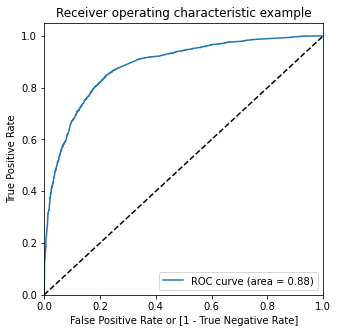

In [226]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

Observations- The ROC Curve should be a value close to 1. We are getting a good value of 0.88 indicating a good predictive model.

####  Finding Optimal Cutoff Value

In [227]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.375091,0,1,1,1,1,0,0,0,0,0,0
1,0,0.147249,0,1,1,0,0,0,0,0,0,0,0
2,0,0.209296,0,1,1,1,0,0,0,0,0,0,0
3,0,0.104019,0,1,1,0,0,0,0,0,0,0,0
4,0,0.058378,0,1,0,0,0,0,0,0,0,0,0


In [228]:
# Now let's calculate accuracy, sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['Prob','Accuracy','Sensitivity','Specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    Accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    Specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,Accuracy,Sensitivity,Specificity]
print(cutoff_df)

     Prob  Accuracy  Sensitivity  Specificity
0.0   0.0   0.37808     1.000000     0.000000
0.1   0.1   0.58976     0.971646     0.357602
0.2   0.2   0.75200     0.911976     0.654747
0.3   0.3   0.80400     0.848498     0.776949
0.4   0.4   0.81344     0.779518     0.834062
0.5   0.5   0.81424     0.696995     0.885516
0.6   0.6   0.79856     0.581464     0.930538
0.7   0.7   0.78528     0.511638     0.951634
0.8   0.8   0.76384     0.423191     0.970929
0.9   0.9   0.72032     0.279729     0.988166


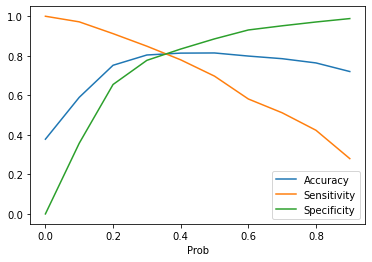

In [229]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='Prob', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

In [230]:
#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

y_train_pred_final['Final_Predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.375091,0,1,1,1,1,0,0,0,0,0,0,1
1,0,0.147249,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.209296,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.104019,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.058378,0,1,0,0,0,0,0,0,0,0,0,0


####  Assigning Lead Score

In [231]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted,Lead_Score
0,0,0.375091,0,1,1,1,1,0,0,0,0,0,0,1,38
1,0,0.147249,0,1,1,0,0,0,0,0,0,0,0,0,15
2,0,0.209296,0,1,1,1,0,0,0,0,0,0,0,0,21
3,0,0.104019,0,1,1,0,0,0,0,0,0,0,0,0,10
4,0,0.058378,0,1,0,0,0,0,0,0,0,0,0,0,6


In [232]:
# Let's check overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.80864

In [233]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted )
confusion2

array([[3118,  769],
       [ 427, 1936]], dtype=int64)

In [234]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [235]:
# Let's see the sensitivity of logistic regression model
TP / float(TP+FN)

0.8192975031739315

In [236]:
# Let us calculate specificity
TN / float(TN+FP)

0.8021610496526884

In [237]:
# Observations from Train Data 
# ROC Curve Value - 0.88
# Accuracy - 80.86
# Sensitivity - 81.92
# Specificity - 80.21

In [238]:
# Calculate false postive rate - predicting Converted when customer does not have converted
print(FP/ float(TN+FP))

0.19783895034731155


In [239]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7157116451016636


In [240]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8795486600846263


####  Precision and Recall

In [241]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted )
confusion

array([[3118,  769],
       [ 427, 1936]], dtype=int64)

In [242]:
# Precision  TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7157116451016636

In [243]:
# Recall   TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8192975031739315

In [244]:
# Using Sklearn Utilities

In [245]:
from sklearn.metrics import precision_score, recall_score

In [246]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)
# precision_score = precision_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)
# precision_score

0.7157116451016636

In [247]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)
# recall_score = recall_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)
# recall_score

0.8192975031739315

In [248]:
# trainF1_score= 2 * (precision_score * recall_score) / (precision_score + recall_score)
# trainF1_score

####  Precision and Recall Score

In [249]:
from sklearn.metrics import precision_recall_curve

In [250]:
y_train_pred_final.Converted, y_train_pred_final.Final_Predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6245    0
 6246    1
 6247    0
 6248    0
 6249    1
 Name: Converted, Length: 6250, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6245    0
 6246    1
 6247    0
 6248    0
 6249    1
 Name: Final_Predicted, Length: 6250, dtype: int64)

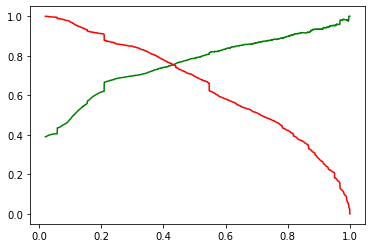

In [251]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making Prediction on Test Set

In [252]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Media and Advertising,Specialization_Others,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
3274,0,0.329794,-0.641978,-0.148702,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
2232,1,-0.030558,1.195907,0.352147,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3871,0,-1.111615,-0.872859,-1.150400,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
8555,0,-0.030558,-0.284662,0.352147,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4673,0,-1.111615,-0.872859,-1.150400,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [253]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_Others_Notable_activity,Last Notable Activity_SMS Sent
4289,0,-0.847205,1,0,0,0,0,0,0,0,0,1
6531,0,-0.872859,0,0,1,0,0,1,1,0,0,0
4404,0,-0.872859,0,0,1,0,0,1,1,0,0,0
9230,0,0.721318,1,0,0,0,1,0,0,0,0,0
2762,0,-0.872859,0,1,0,0,0,0,0,1,0,0


In [254]:
X_test_sm = sm.add_constant(X_test)

####  Making Prediction on Test Set

In [255]:
y_test_pred = res.predict(X_test_sm)

In [256]:
y_test_pred[:10]

4289    0.325344
6531    0.058378
4404    0.058378
9230    0.360024
2762    0.994459
895     0.287454
3313    0.504222
6784    0.995973
6983    0.254216
1869    0.708649
dtype: float64

In [257]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [258]:
y_pred_1.head()

,0
4289,0.325344
6531,0.058378
4404,0.058378
9230,0.360024
2762,0.994459


In [259]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [260]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [261]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [262]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [263]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,4289,0.325344
1,0,6531,0.058378
2,0,4404,0.058378
3,0,9230,0.360024
4,1,2762,0.994459


In [264]:
# Renaming the column 0
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [265]:
y_pred_final.head()

,Converted,Prospect ID,Converted_Prob
0,0,4289,0.325344
1,0,6531,0.058378
2,0,4404,0.058378
3,0,9230,0.360024
4,1,2762,0.994459


In [266]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_Prob']]
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,4289,0,0.325344
1,6531,0,0.058378
2,4404,0,0.058378
3,9230,0,0.360024
4,2762,1,0.994459


In [267]:
y_pred_final['Final_Predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Final_Predicted
0,4289,0,0.325344,0
1,6531,0,0.058378,0
2,4404,0,0.058378,0
3,9230,0,0.360024,1
4,2762,1,0.994459,1


In [268]:
# Adding Lead score column
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Final_Predicted,Lead_Score
0,4289,0,0.325344,0,33
1,6531,0,0.058378,0,6
2,4404,0,0.058378,0,6
3,9230,0,0.360024,1,36
4,2762,1,0.994459,1,99


In [269]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

0.8066442702500933

In [270]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Predicted )
confusion2

array([[1325,  332],
       [ 186,  836]], dtype=int64)

In [271]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [272]:
# Let's see the sensitivity of logistic regression model
TP / float(TP+FN)

0.8180039138943248

In [273]:
# Let us calculate specificity
TN / float(TN+FP)

0.79963789981895

In [274]:
precision_score(y_pred_final.Converted , y_pred_final.Final_Predicted)
# precision_score = precision_score(y_pred_final.Converted , y_pred_final.Final_Predicted)
# precision_score

0.7157534246575342

In [275]:
recall_score(y_pred_final.Converted, y_pred_final.Final_Predicted)
# recall_score = recall_score(y_pred_final.Converted, y_pred_final.Final_Predicted)
# recall_score

0.8180039138943248

In [276]:
# testF1_score= 2 * (precision_score * recall_score) / (precision_score + recall_score)
# testF1_score

In [277]:
# Observation from Test Data
# Accuracy - 80.66
# Sensitivity - 81.80
# Specificity - 79.96